In [1]:
import numpy as np
import netCDF4 as nc
import f90nml
import os
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bio
from salishsea_tools import visualisations
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [2]:
bathy = nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

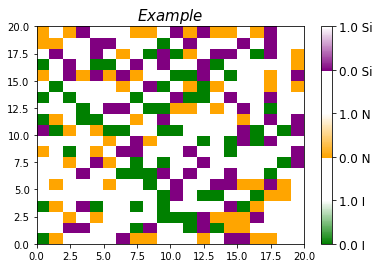

In [3]:
vmax = 5.0
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'green'),
                                                    (1 / vmax, 'white'),
                                                    (1.99 / vmax, 'white'),
                                                    (2 / vmax, 'orange'),
                                                    (3 / vmax, 'white'),
                                                    (3.99 / vmax, 'white'),
                                                    (4 / vmax, 'purple'),
                                                    (5 / vmax, 'white')]
                                        )
fig, ax = plt.subplots()
mesh1 = ax.pcolormesh(np.random.randint(0,6, size=(20,20)), cmap = cmap)
ticks = [0,1,2,3,4,5]
cbar1 = fig.colorbar(mesh1, ax=ax)
cbar1.set_ticks([0,1,2,3,4,5])
cbar1.set_ticklabels(['0.0 I', '1.0 I', '0.0 N', '1.0 N', '0.0 Si', '1.0 Si'])
ax.set_title('$Example$', fontsize =15)
cbar1.ax.tick_params(labelsize = 12)

In [4]:
def limit_along_thalweg(path, diafile, ptrcfile, phytoplankton):
    resDir=path
    ressub=resDir[:-7]+'01'+resDir[-5:]
    nampisprod=bio.load_nml_bio(ressub,'nampisprod',
                            namRefDir='/results2/SalishSea/nowcast-green.201905/01jan15')
    fdia=nc.Dataset(os.path.join(resDir,diafile))
    fptc=nc.Dataset(os.path.join(resDir,ptrcfile))
    with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as m:
        tmask=m.variables['tmask'][:,:,:,:]
    I=fdia.variables['PAR'][19,:,:,:]
    NO= fptc.variables['nitrate'][19,:,:,:]
    NH= fptc.variables['ammonium'][19,:,:,:] 
    Si= fptc.variables['silicon'][19,:,:,:]
    if phytoplankton == 'N':
        fig, ax = plt.subplots(2,1,figsize = (14,6))
        cbar1 = visualisations.contour_thalweg(ax[0], NO, bathy, mesh, 
                                               cmap = 'Greens', method='pcolormesh',
                                              mesh_args={'vmin':0,'vmax':40})
        cbar2 = visualisations.contour_thalweg(ax[1], NH, bathy, mesh,
                                               cmap = 'Purples', method='pcolormesh',
                                              mesh_args={'vmin':0,'vmax':7})
        ax[0].set_title('Nitrate', fontsize = 15)
        ax[1].set_title('Ammonium', fontsize = 15)
    else:
        D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,:,:],nampisprod)
        if phytoplankton == 'dia':
            fig, ax = plt.subplots(3,1,figsize = (18,10))
            cbar1 = visualisations.contour_thalweg(ax[0], D['limiter'], bathy, mesh, 
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5})
            cbar2 = visualisations.contour_thalweg(ax[1], D['limval'], bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5})
            cbar3 = visualisations.contour_thalweg(ax[2], D['NLim']+2, bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5},
                                               cbar_args={'boundaries':np.linspace(2,3,20)})
            ax[0].set_title('Limiting Variable for Diatoms', fontsize = 15)
            ax[1].set_title('Rate Limitation Factor for Diatoms', fontsize = 15)
            ax[2].set_title('Nitrate Limiting Value for Diatoms', fontsize = 15)
        elif phytoplankton == 'meso':
            fig, ax = plt.subplots(3,1,figsize = (18,10))
            cbar1 = visualisations.contour_thalweg(ax[0], M['limiter'], bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5})
            cbar2 = visualisations.contour_thalweg(ax[1], M['limval'], bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5})
            cbar3 = visualisations.contour_thalweg(ax[2], M['NLim']+2, bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5},
                                               cbar_args={'boundaries':np.linspace(2,3,20)})
            ax[0].set_title('Limiting Variable for $Mesodinium$', fontsize = 15)
            ax[1].set_title('Rate Limitation Factor for $Mesodinium$', fontsize = 15)
            ax[2].set_title('Nitrate Limiting Value for $Mesodinium$', fontsize = 15)
        elif phytoplankton == 'flag':
            fig, ax = plt.subplots(3,1,figsize = (18,10))
            cbar1 = visualisations.contour_thalweg(ax[0], N['limiter'], bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5})
            cbar2 = visualisations.contour_thalweg(ax[1], N['limval'], bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5})
            cbar3 = visualisations.contour_thalweg(ax[2], N['NLim']+2, bathy, mesh,
                                               cmap = cmap, method='pcolormesh',land_colour='gray',
                                               mesh_args={'vmin':0, 'vmax':5},
                                               cbar_args={'boundaries':np.linspace(2,3,20)})
            ax[0].set_title('Limiting Variable for Flagellates', fontsize = 15)
            ax[1].set_title('Rate Limitation Factor for Flagellates', fontsize = 15)
            ax[2].set_title('Nitrate Limiting Value for Flagellates', fontsize = 15)
        cbar1.set_ticks([0.2,2.2,4.2])
        cbar1.set_ticklabels(['I', 'N', 'Si'])
        cbar1.ax.tick_params(labelsize=12)
        cbar2.set_ticks([0,1,2,3,4,5])
        cbar2.set_ticklabels(['0.0 I','1.0 I','0.0 N','1.0 N','0.0 Si','1.0 Si'])
        cbar2.ax.tick_params(labelsize=12)
        cbar3.set_ticks([2,2.5,3])
        cbar3.set_ticklabels(['0.0','0.5','1.0'])
        cbar3.ax.tick_params(labelsize=12)
    for ax in ax:
        ax.set_ylim(35,0)
    plt.tight_layout()

# January 2016

In [5]:
modelbase='/results2/SalishSea/nowcast-green.201905/'

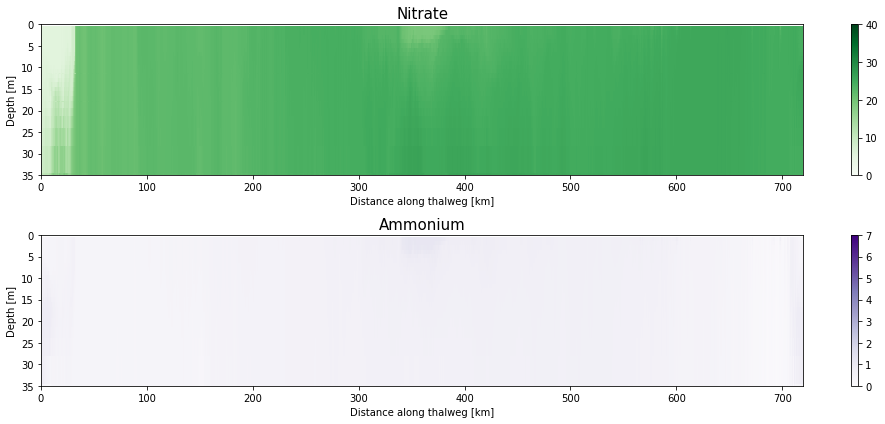

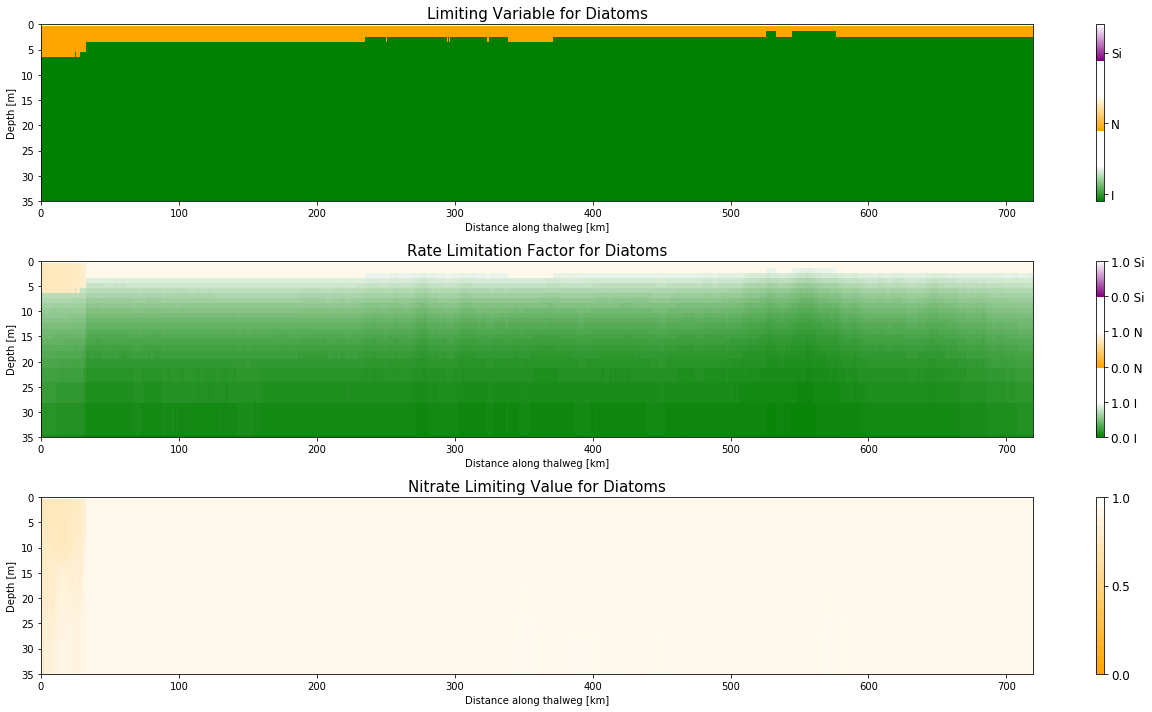

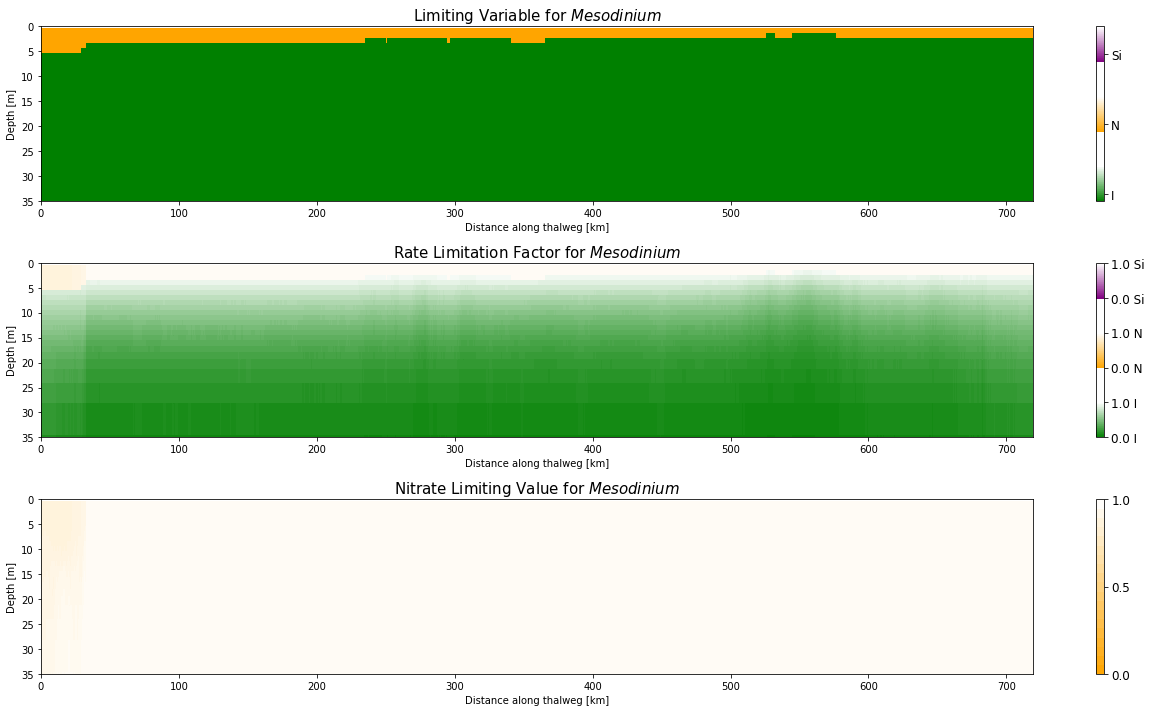

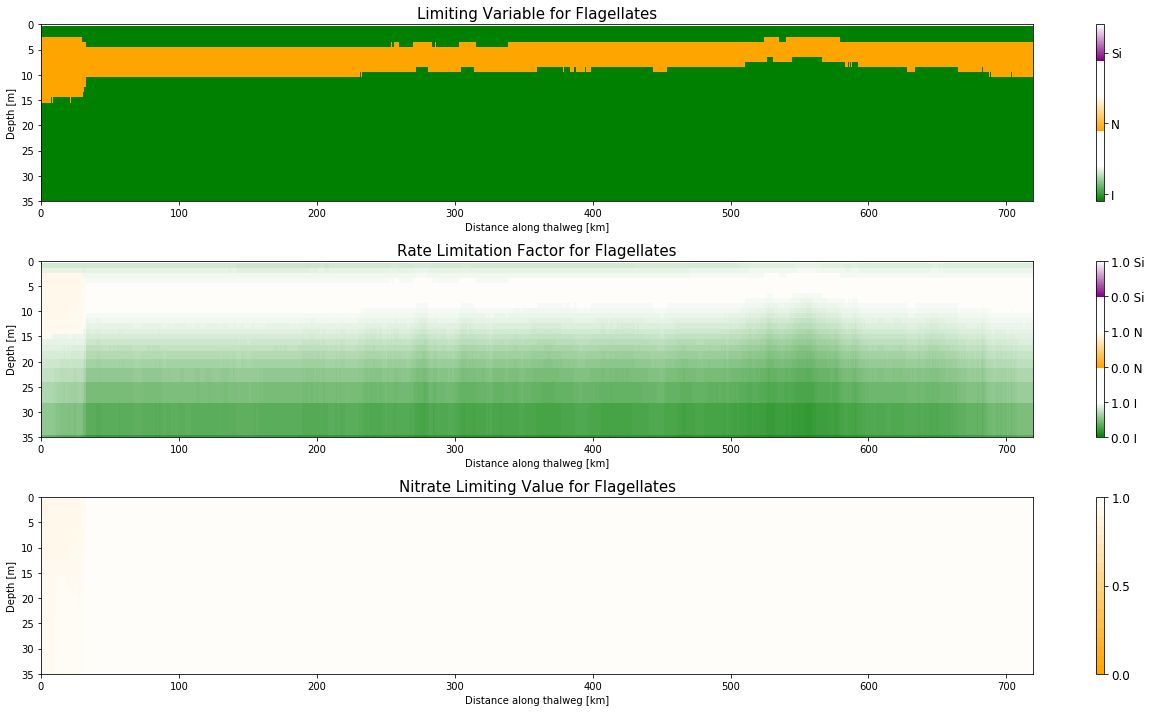

In [6]:
limit_along_thalweg(modelbase+'02jan16', 
                    'SalishSea_1h_20160102_20160102_carp_T.nc',
                    'SalishSea_1h_20160102_20160102_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'02jan16', 
                    'SalishSea_1h_20160102_20160102_carp_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'02jan16', 
                    'SalishSea_1h_20160102_20160102_carp_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'02jan16', 
                    'SalishSea_1h_20160102_20160102_carp_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc', 'flag')

# Febuary 2016

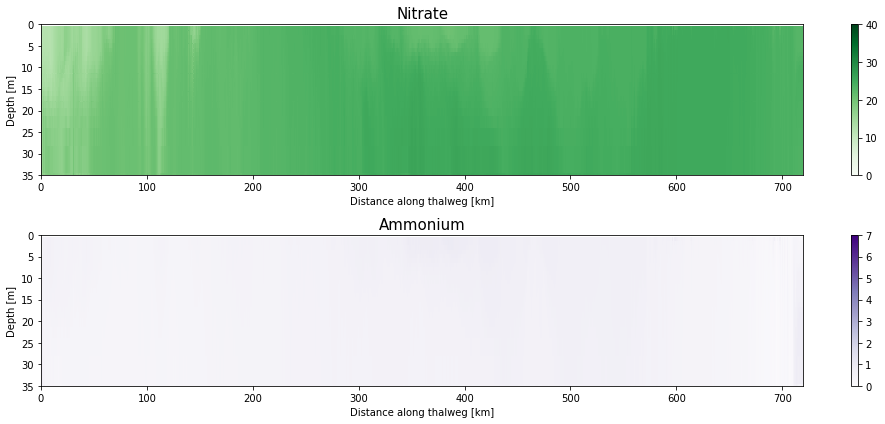

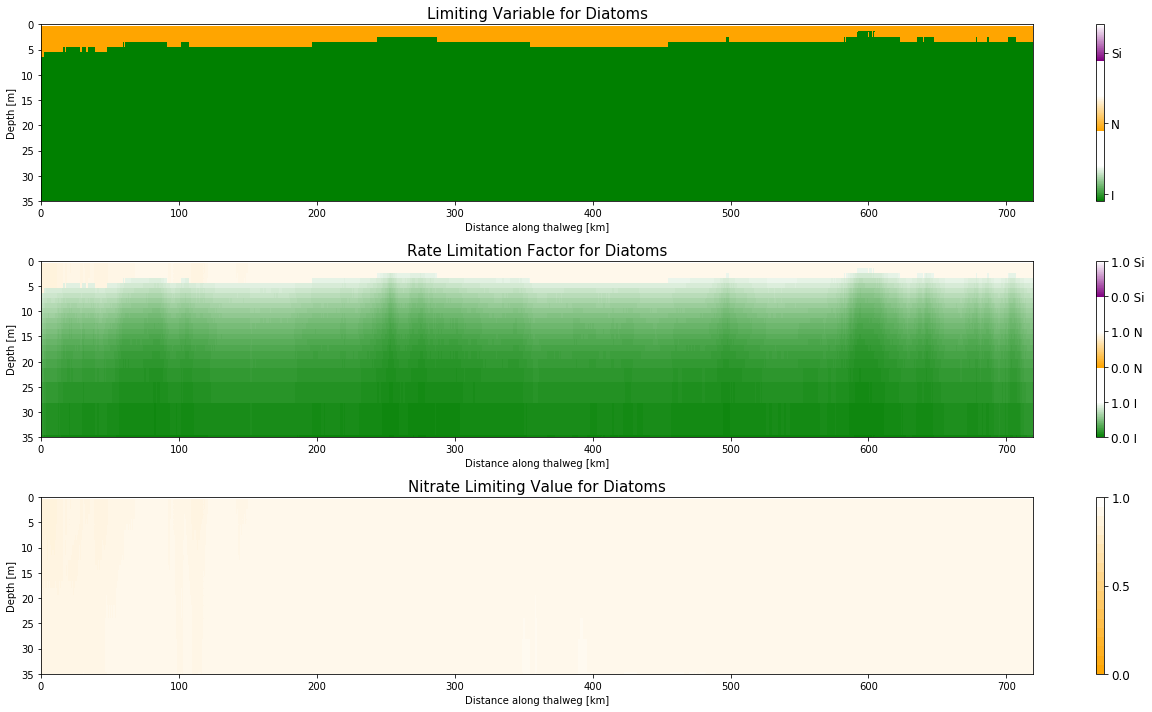

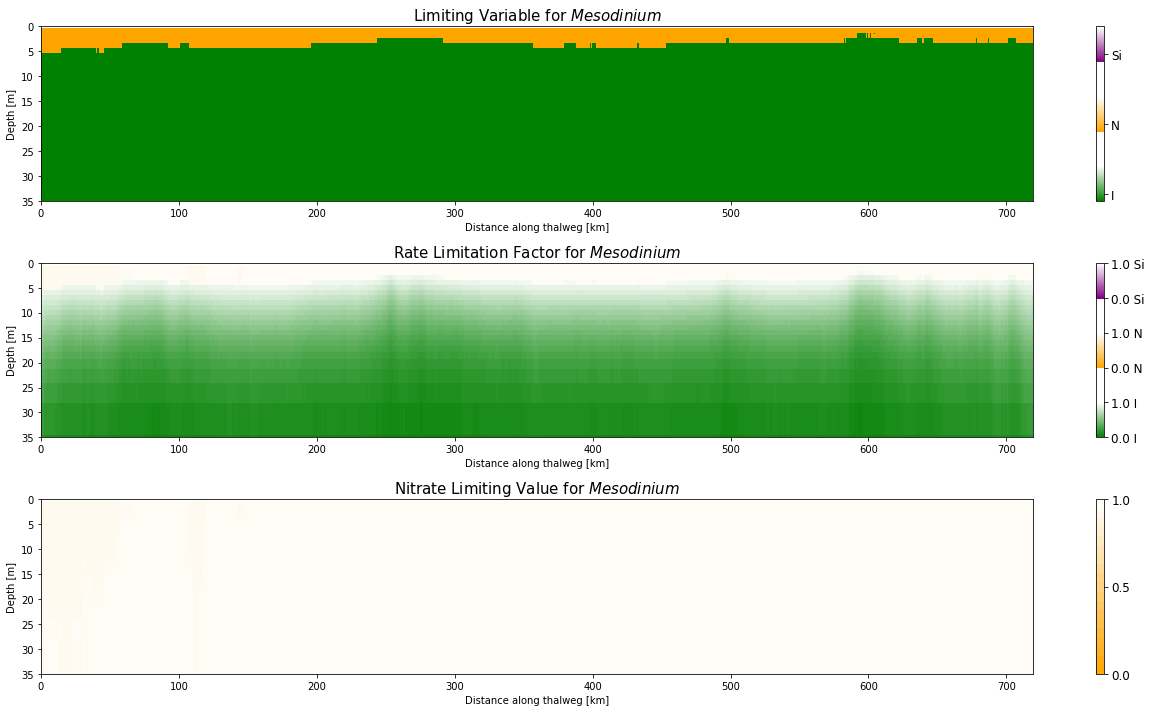

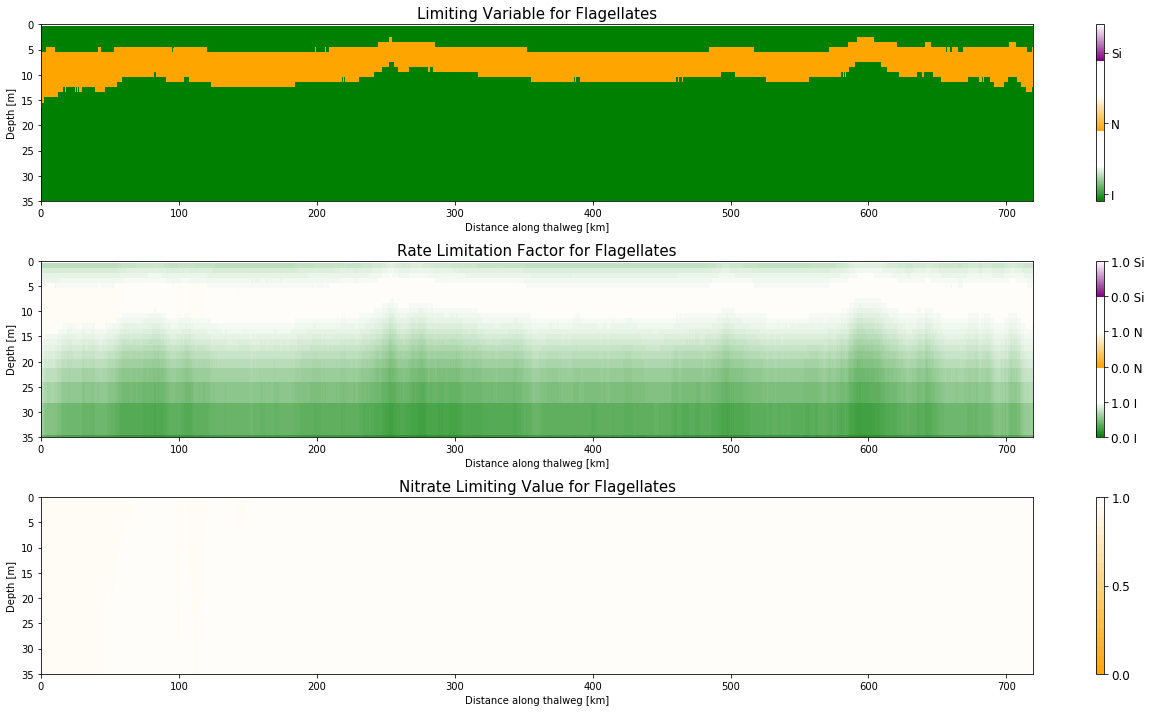

In [7]:
limit_along_thalweg(modelbase+'01feb16', 
                    'SalishSea_1h_20160201_20160201_carp_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'01feb16', 
                    'SalishSea_1h_20160201_20160201_carp_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'01feb16', 
                    'SalishSea_1h_20160201_20160201_carp_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'01feb16', 
                    'SalishSea_1h_20160201_20160201_carp_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc', 'flag')

# March 2016

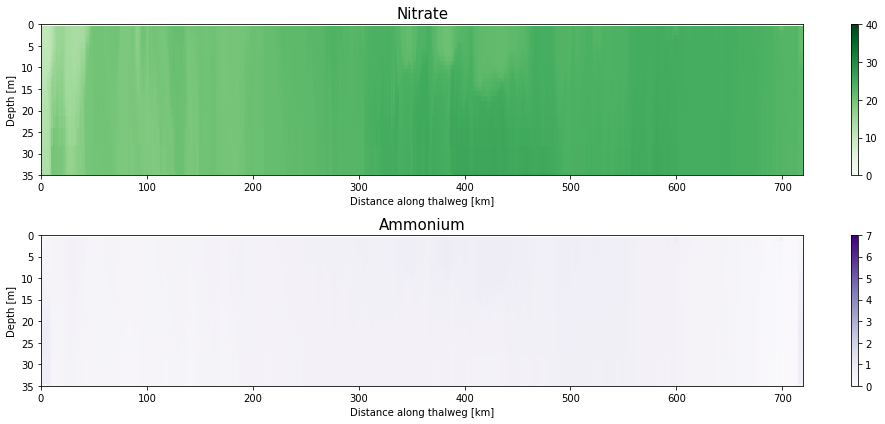

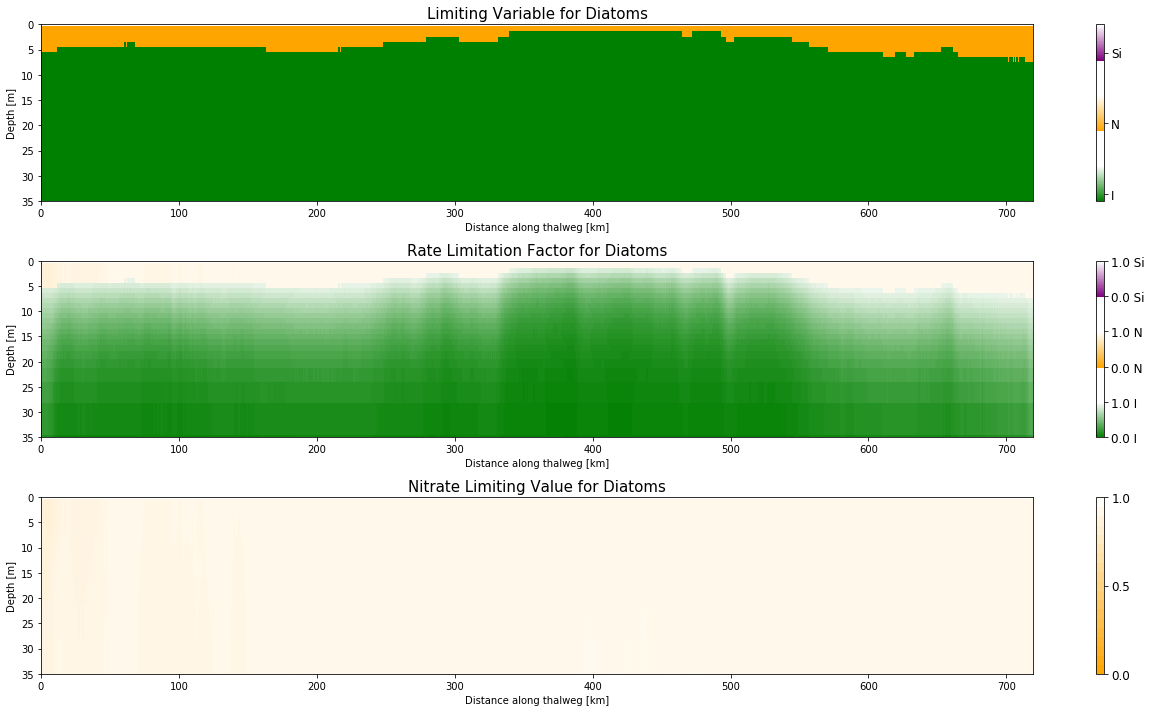

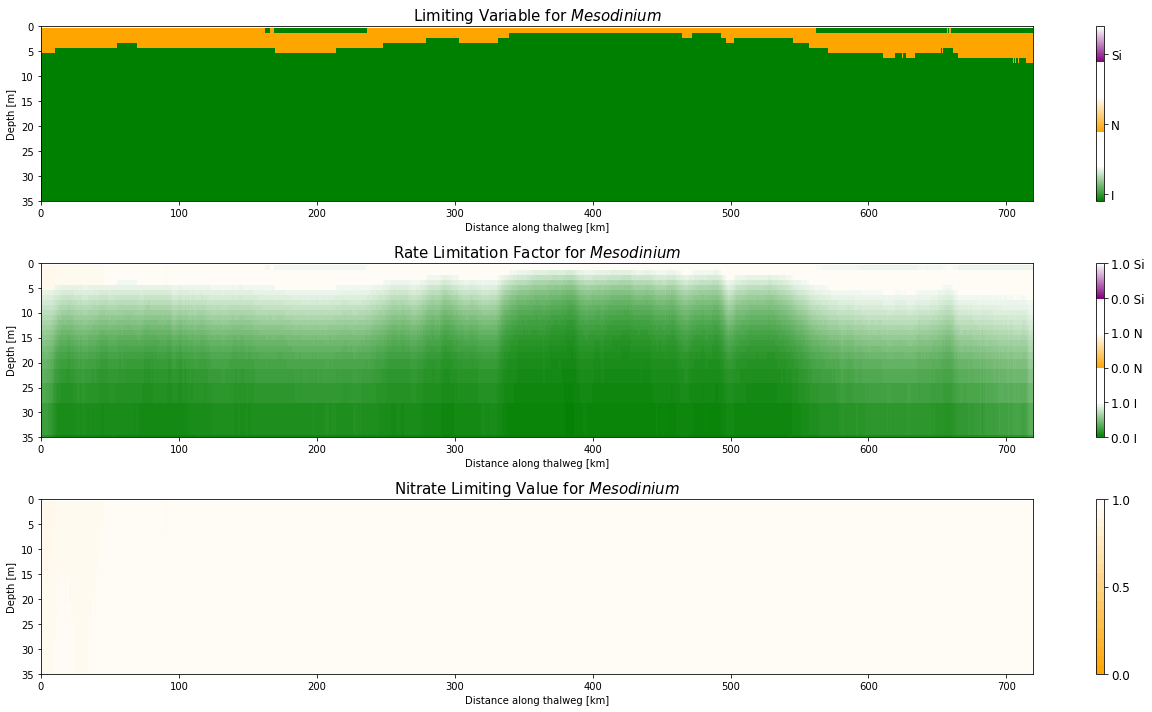

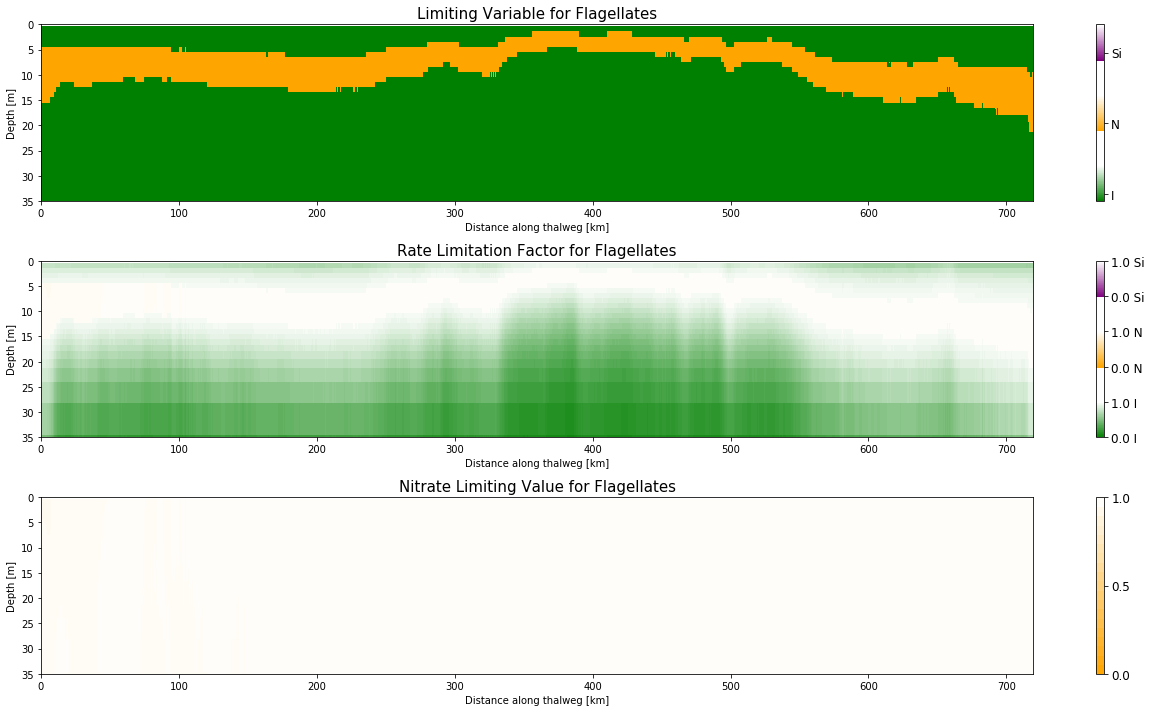

In [8]:
limit_along_thalweg(modelbase+'02mar16',
                   'SalishSea_1h_20160302_20160302_carp_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'02mar16',
                   'SalishSea_1h_20160302_20160302_carp_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'02mar16',
                   'SalishSea_1h_20160302_20160302_carp_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'02mar16',
                   'SalishSea_1h_20160302_20160302_carp_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc', 'flag')

# April 2016

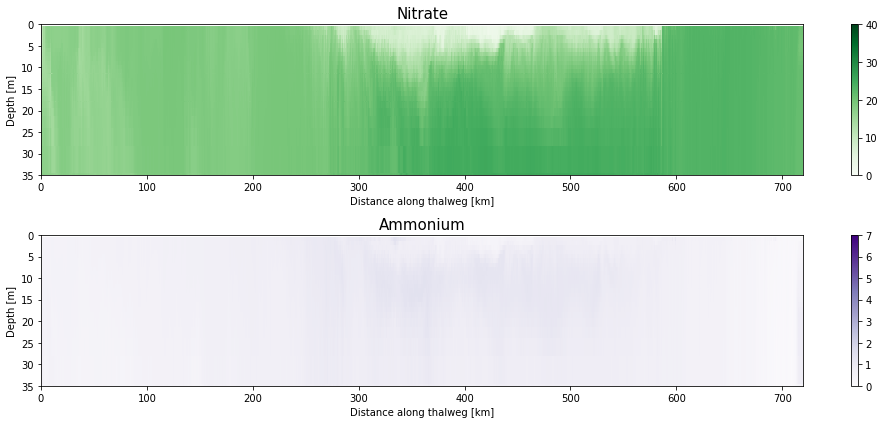

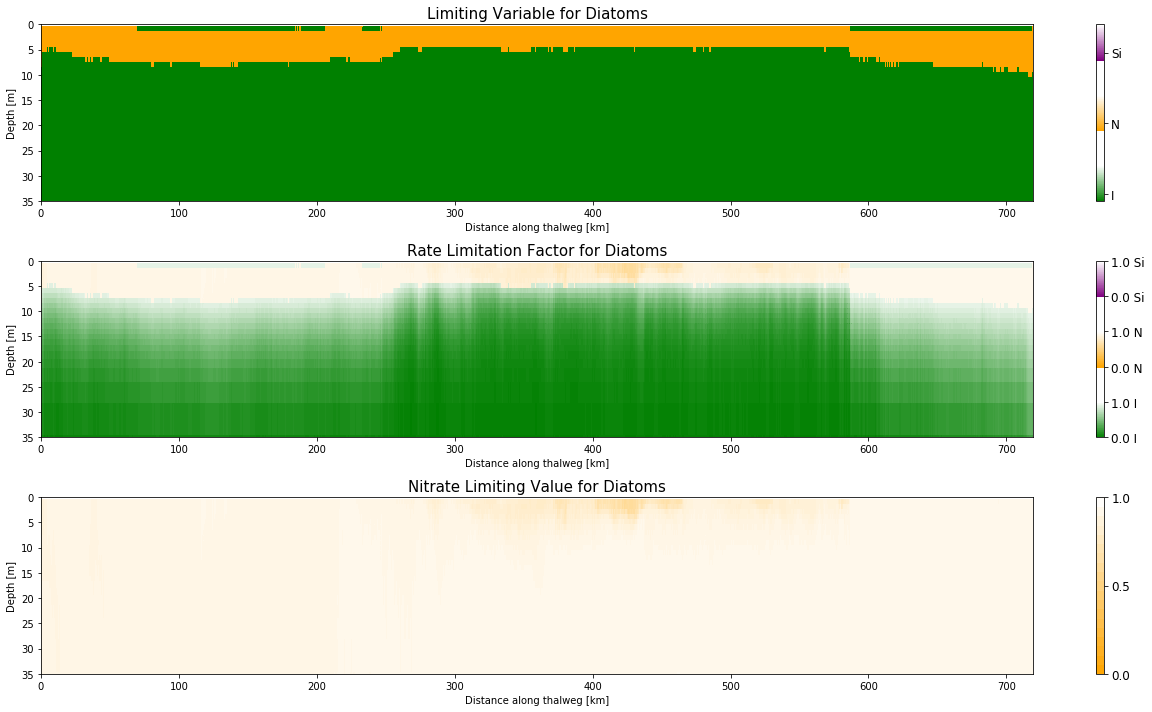

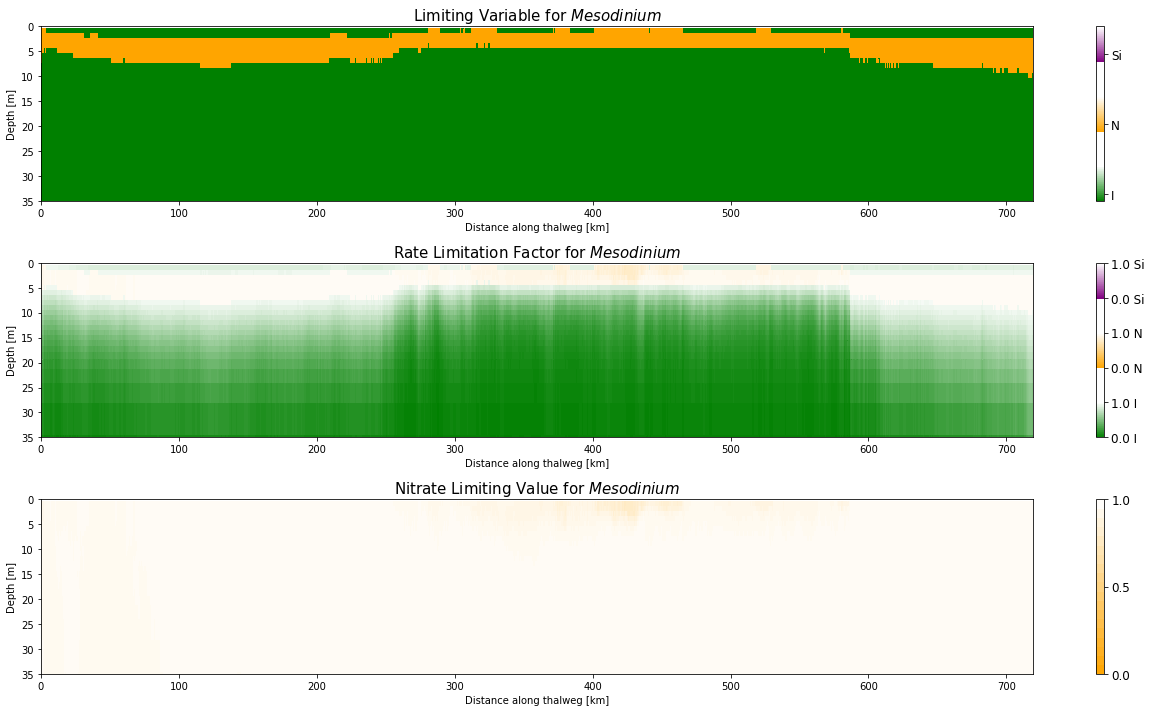

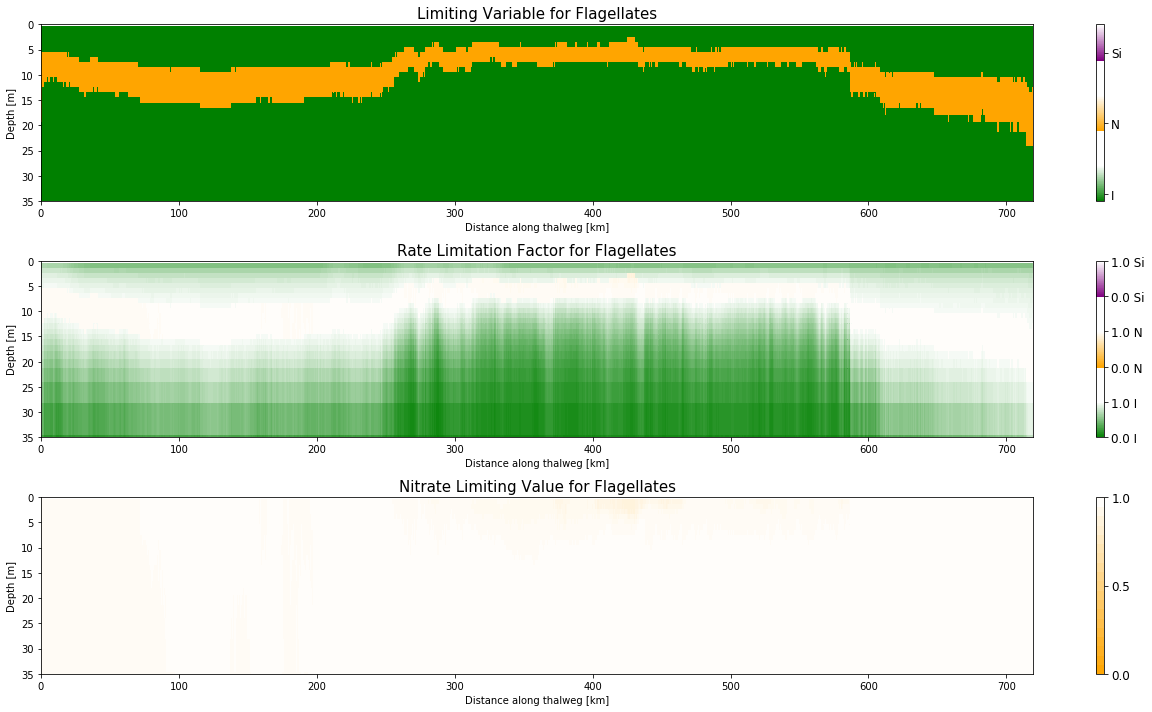

In [9]:
limit_along_thalweg(modelbase+'01apr16',
                   'SalishSea_1h_20160401_20160401_carp_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'01apr16',
                   'SalishSea_1h_20160401_20160401_carp_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'01apr16',
                   'SalishSea_1h_20160401_20160401_carp_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'01apr16',
                   'SalishSea_1h_20160401_20160401_carp_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc', 'flag')

# May 2016

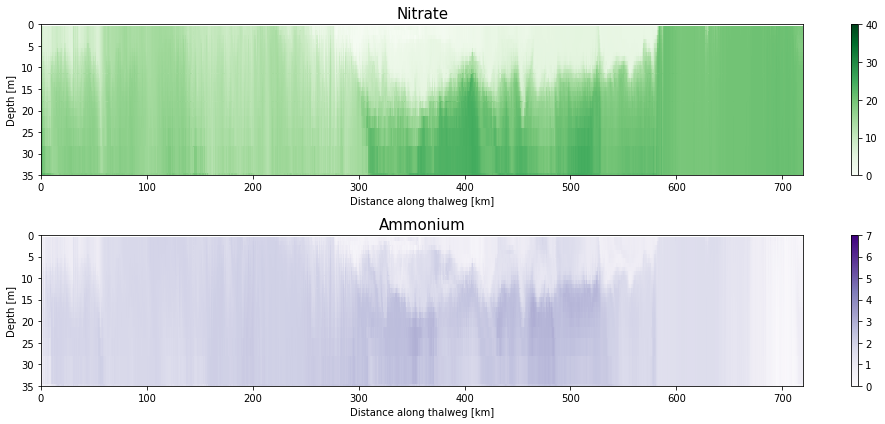

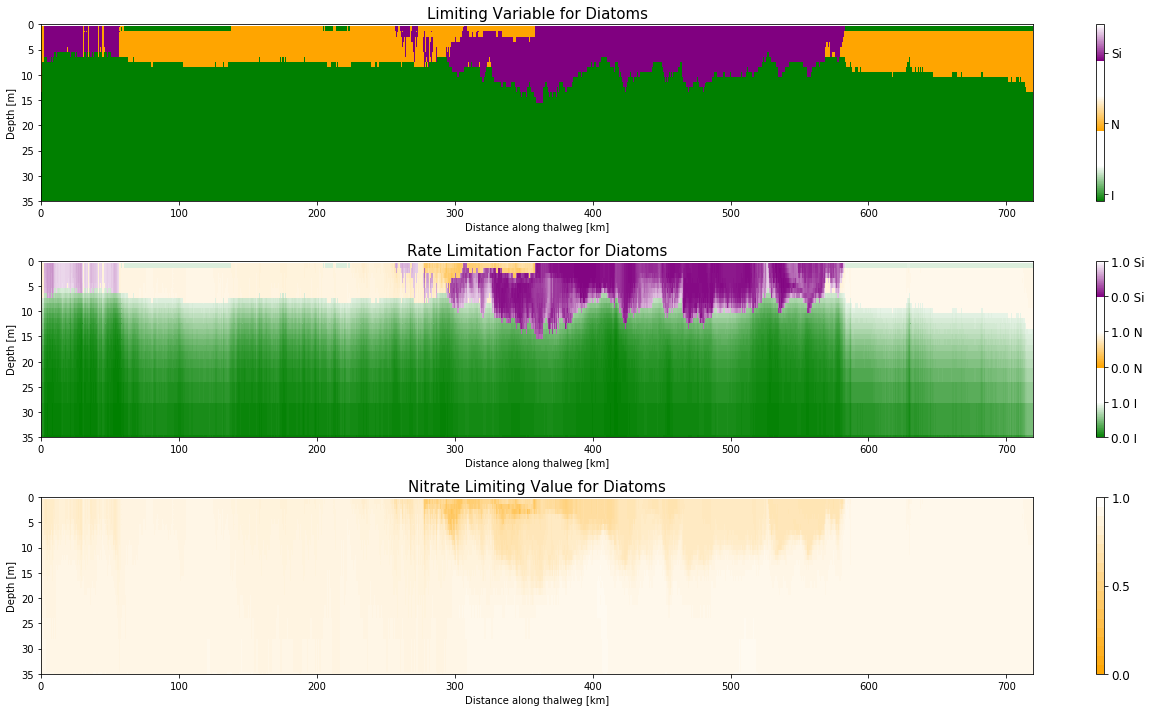

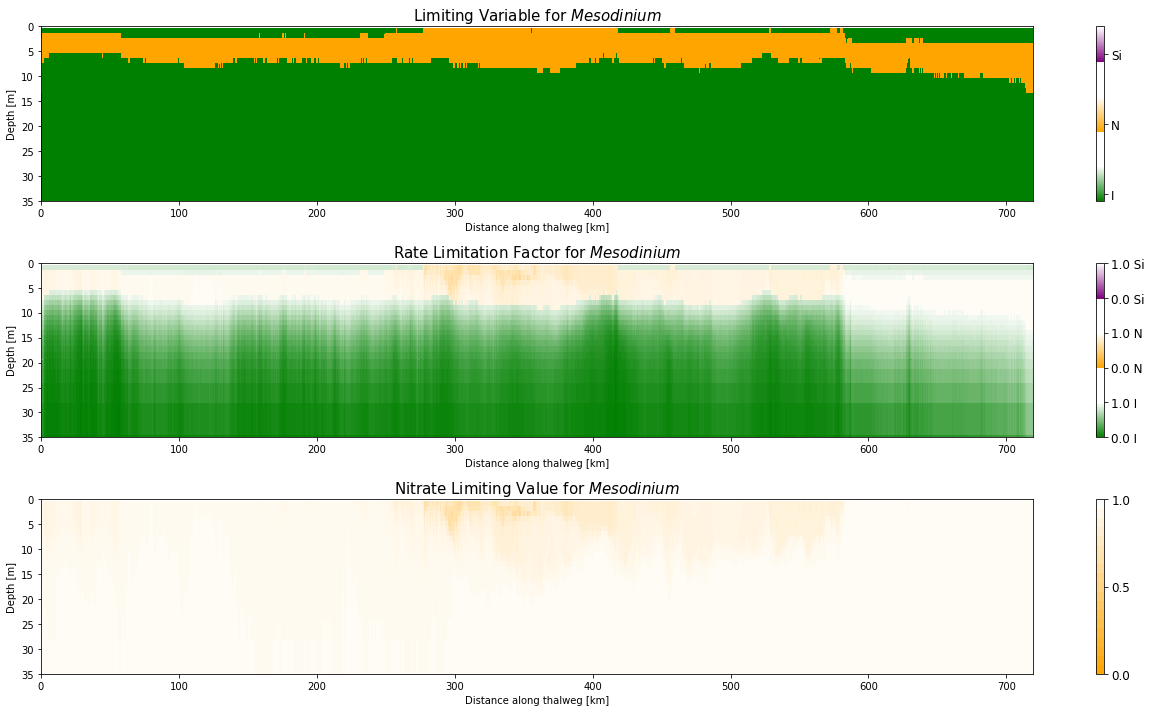

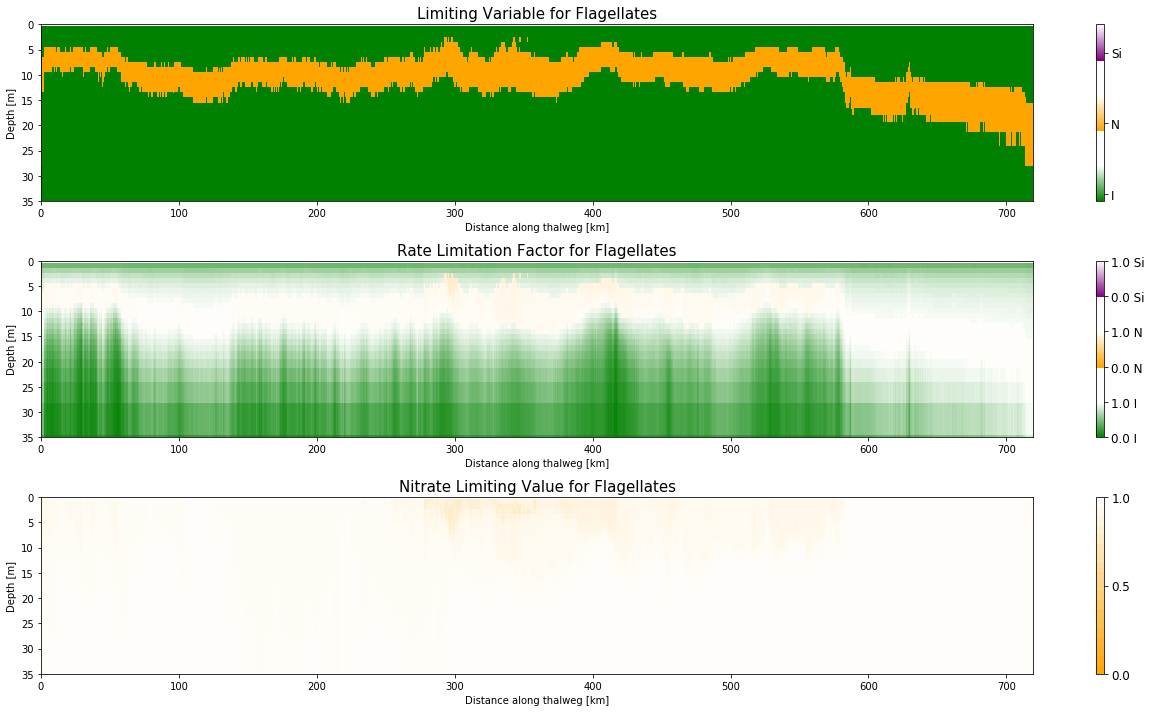

In [10]:
limit_along_thalweg(modelbase+'01may16',
                   'SalishSea_1h_20160501_20160501_carp_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'01may16',
                   'SalishSea_1h_20160501_20160501_carp_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'01may16',
                   'SalishSea_1h_20160501_20160501_carp_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'01may16',
                   'SalishSea_1h_20160501_20160501_carp_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc', 'flag')

# June 2016

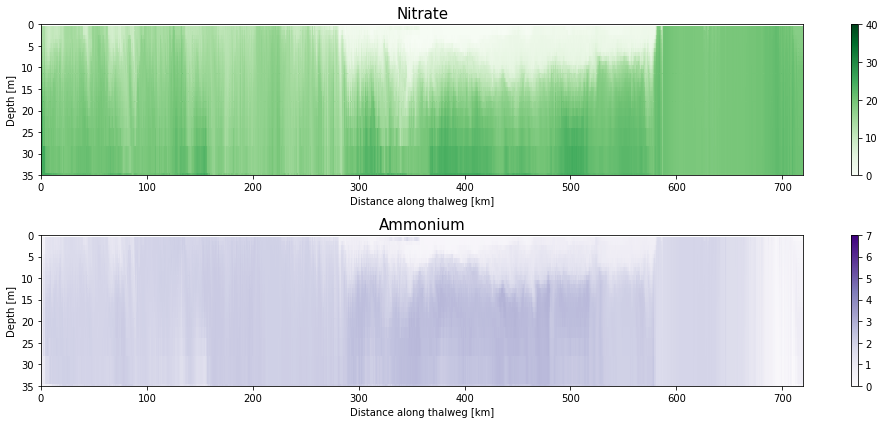

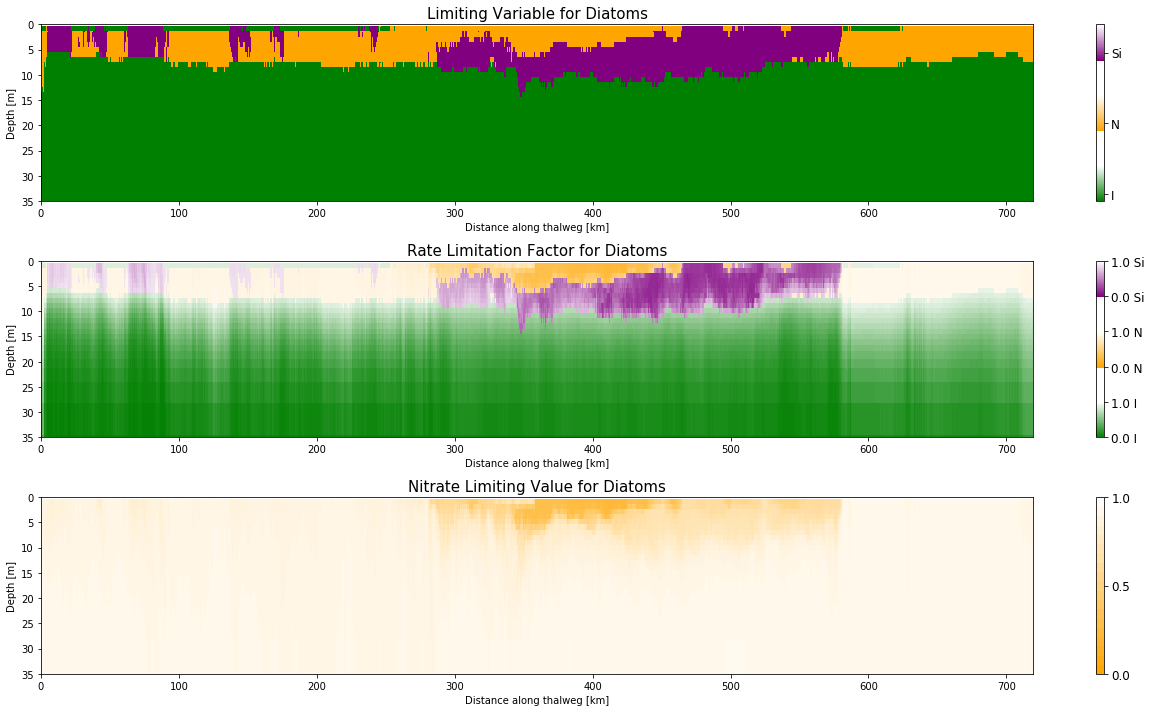

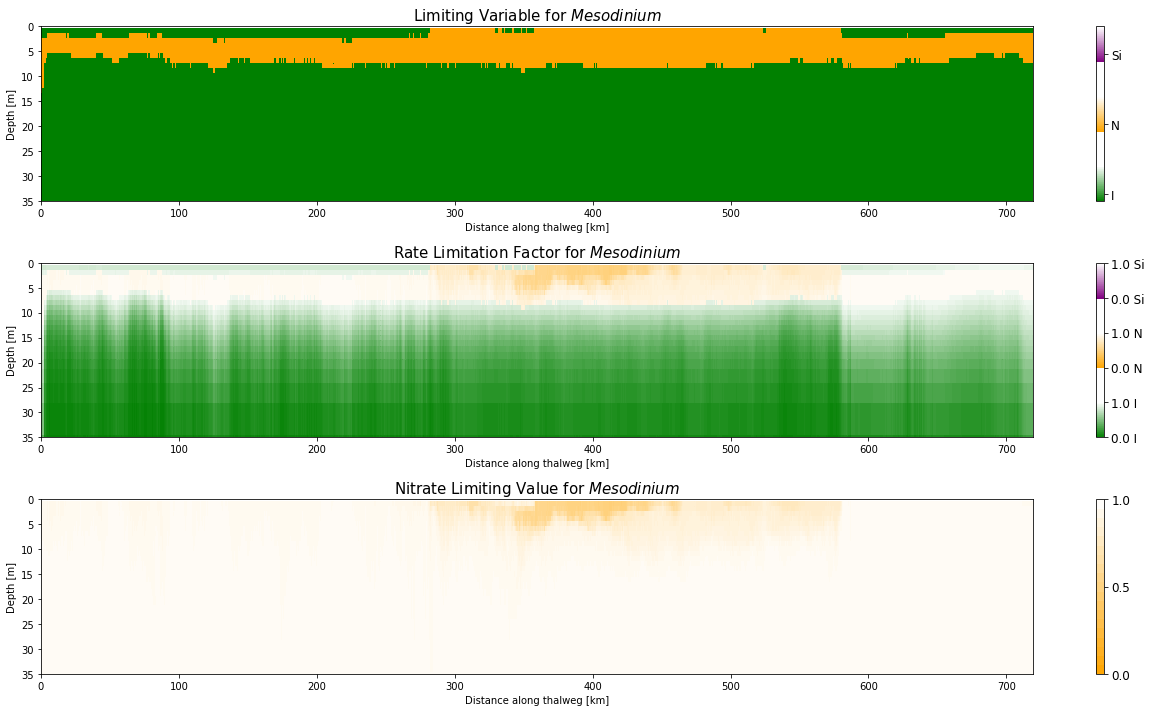

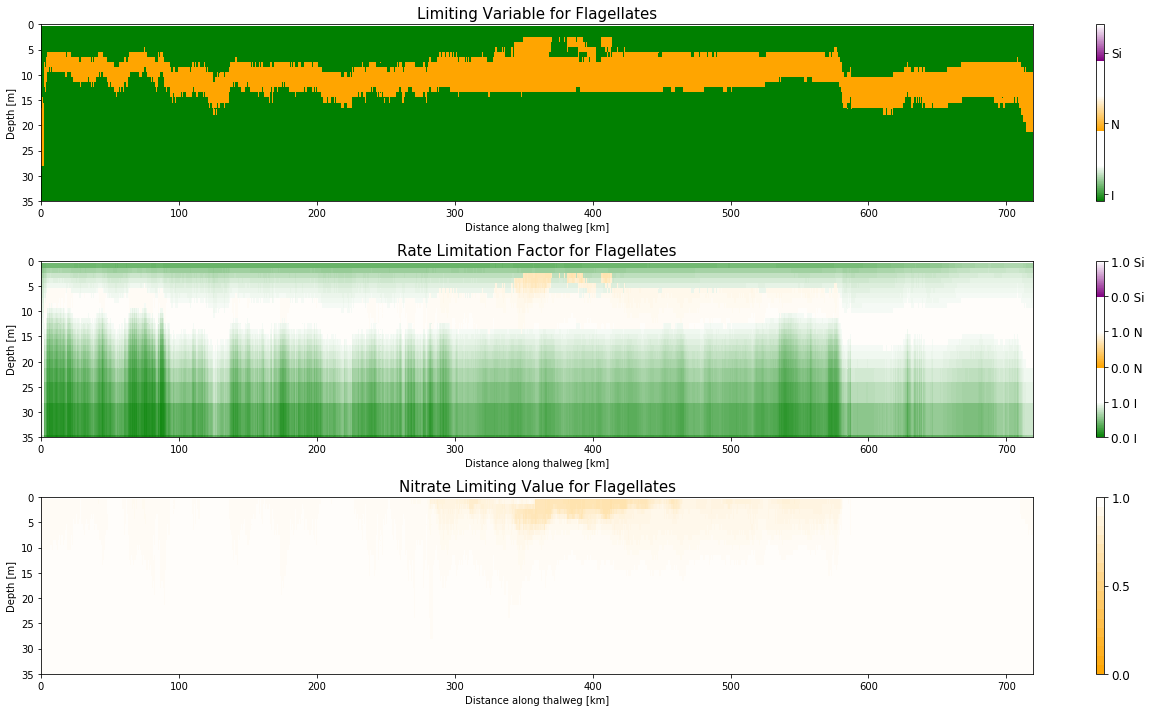

In [11]:
limit_along_thalweg(modelbase+'31may16',
                   'SalishSea_1h_20160531_20160531_carp_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'31may16',
                   'SalishSea_1h_20160531_20160531_carp_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'31may16',
                   'SalishSea_1h_20160531_20160531_carp_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'31may16',
                   'SalishSea_1h_20160531_20160531_carp_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc', 'flag')

# July 2016

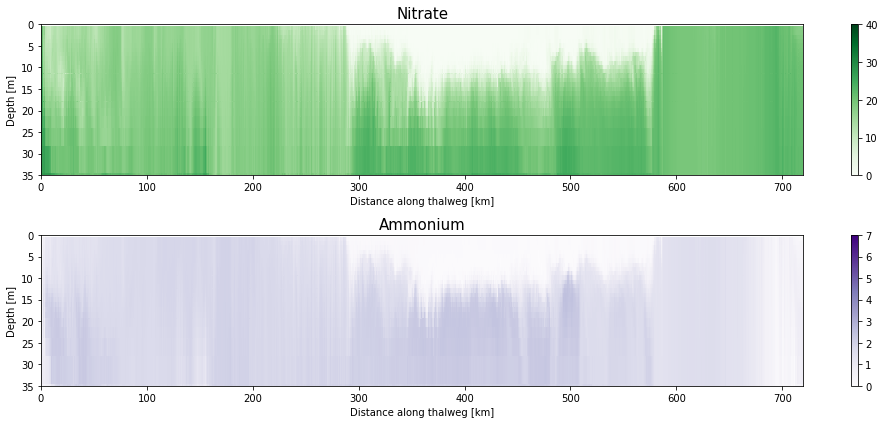

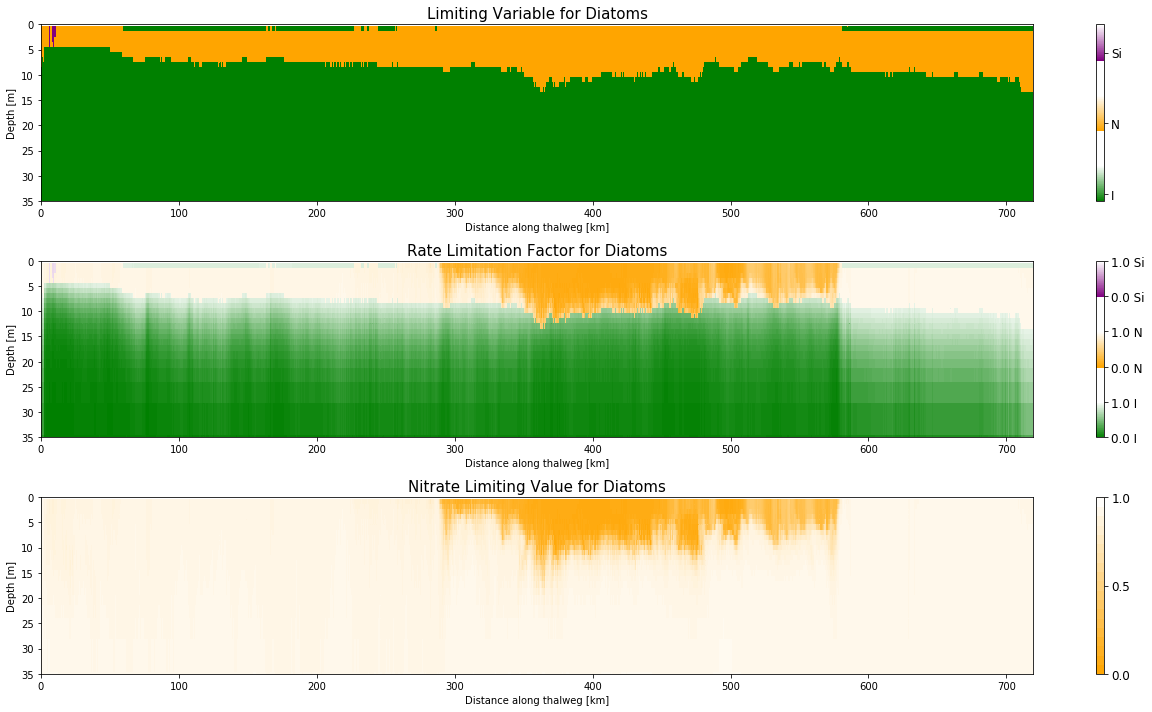

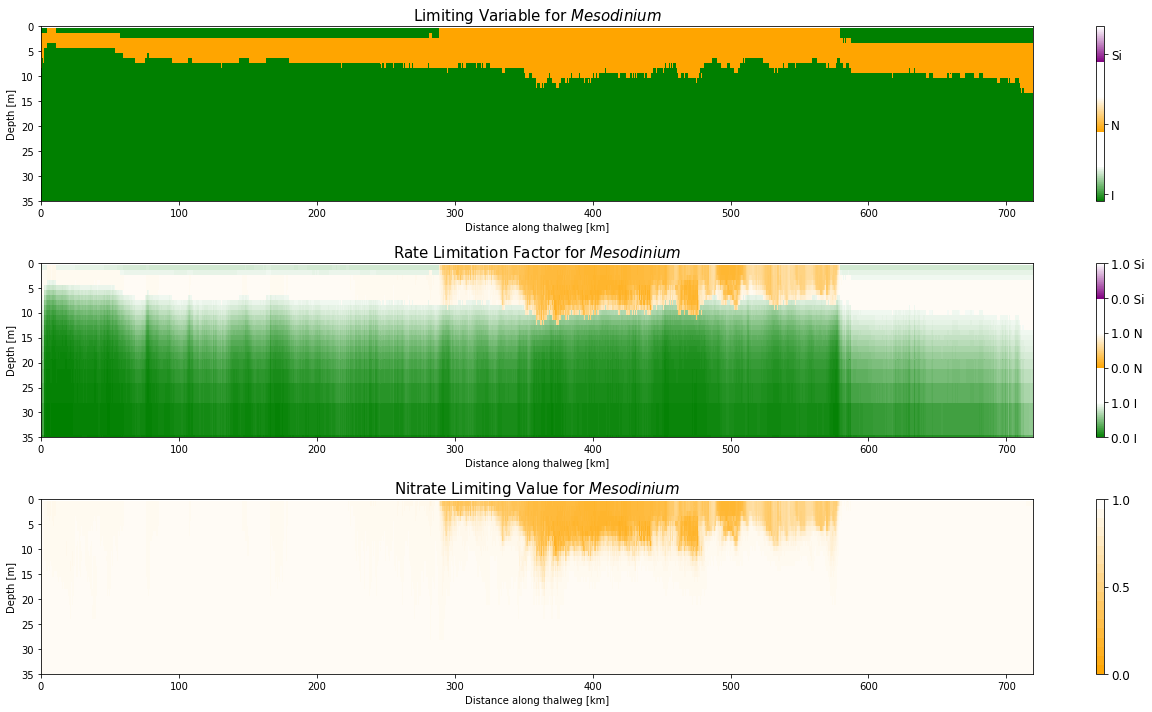

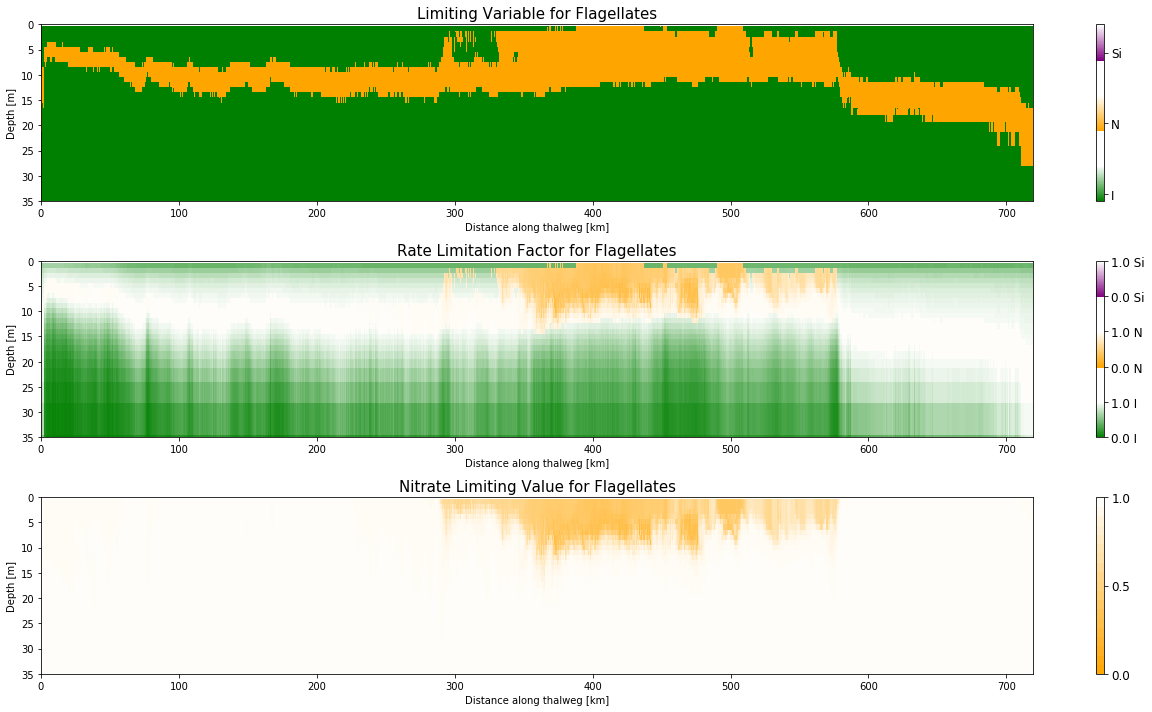

In [12]:
limit_along_thalweg(modelbase+'30jun16',
                   'SalishSea_1h_20160630_20160630_carp_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'30jun16',
                   'SalishSea_1h_20160630_20160630_carp_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'30jun16',
                   'SalishSea_1h_20160630_20160630_carp_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'30jun16',
                   'SalishSea_1h_20160630_20160630_carp_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc', 'flag')

# August 2016

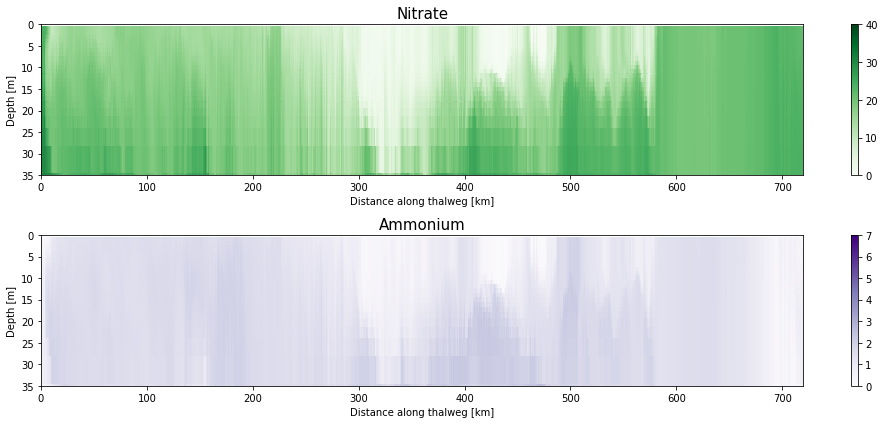

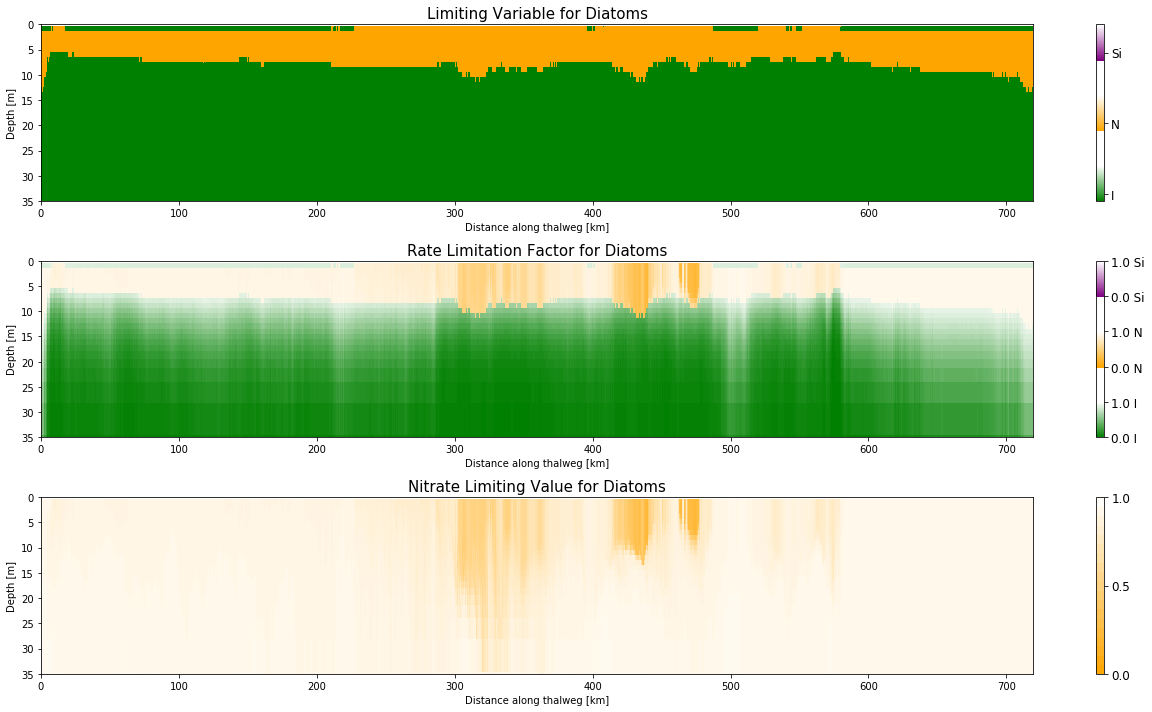

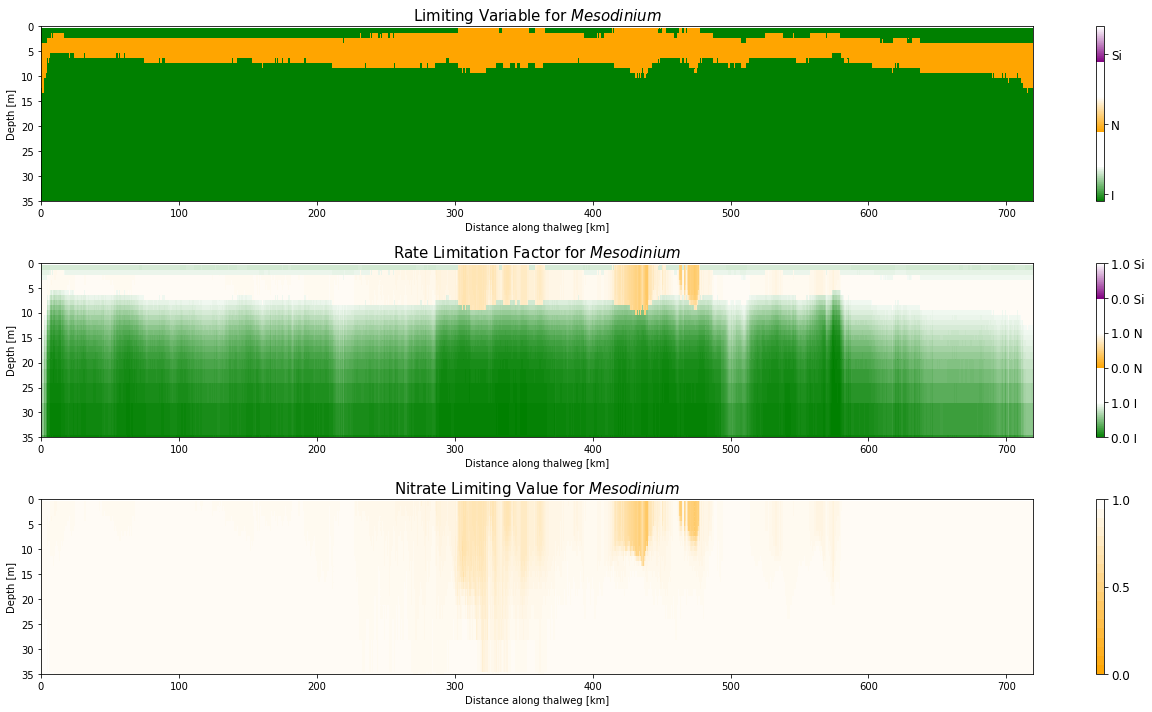

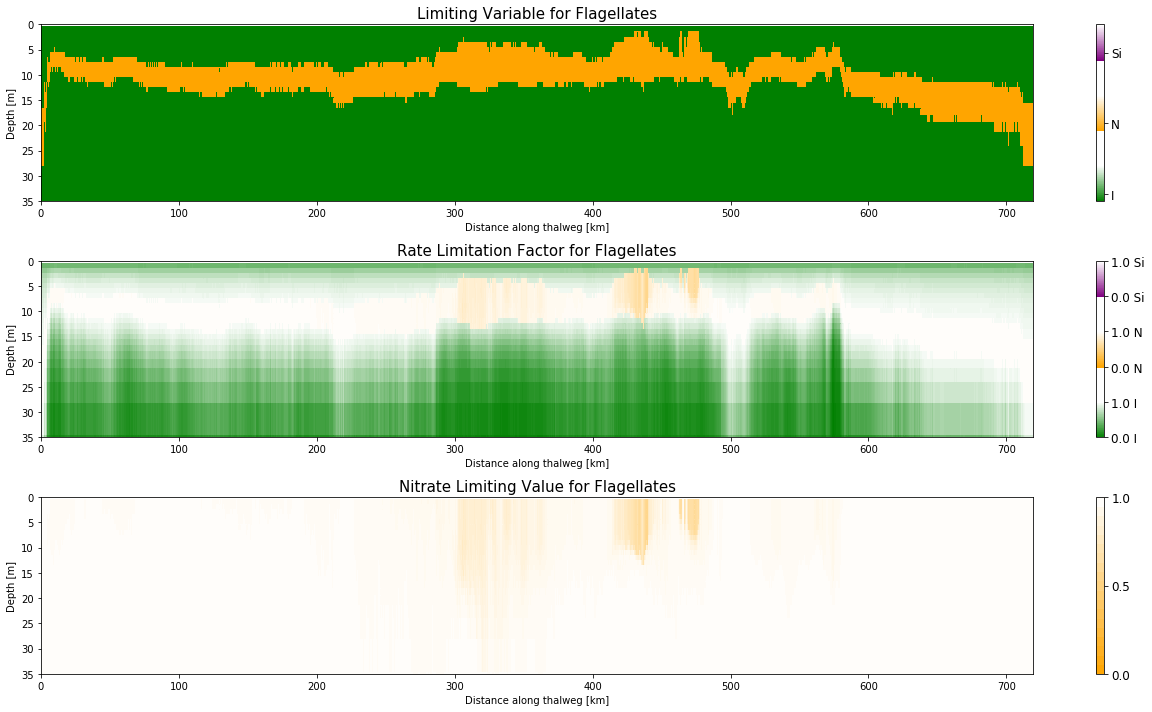

In [13]:
limit_along_thalweg(modelbase+'30jul16',
                   'SalishSea_1h_20160730_20160730_carp_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'30jul16',
                   'SalishSea_1h_20160730_20160730_carp_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'30jul16',
                   'SalishSea_1h_20160730_20160730_carp_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'30jul16',
                   'SalishSea_1h_20160730_20160730_carp_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc', 'flag')

# September 2016

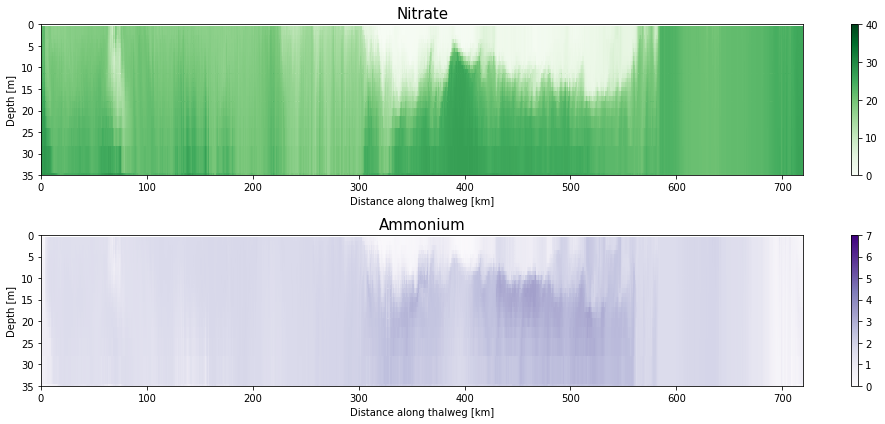

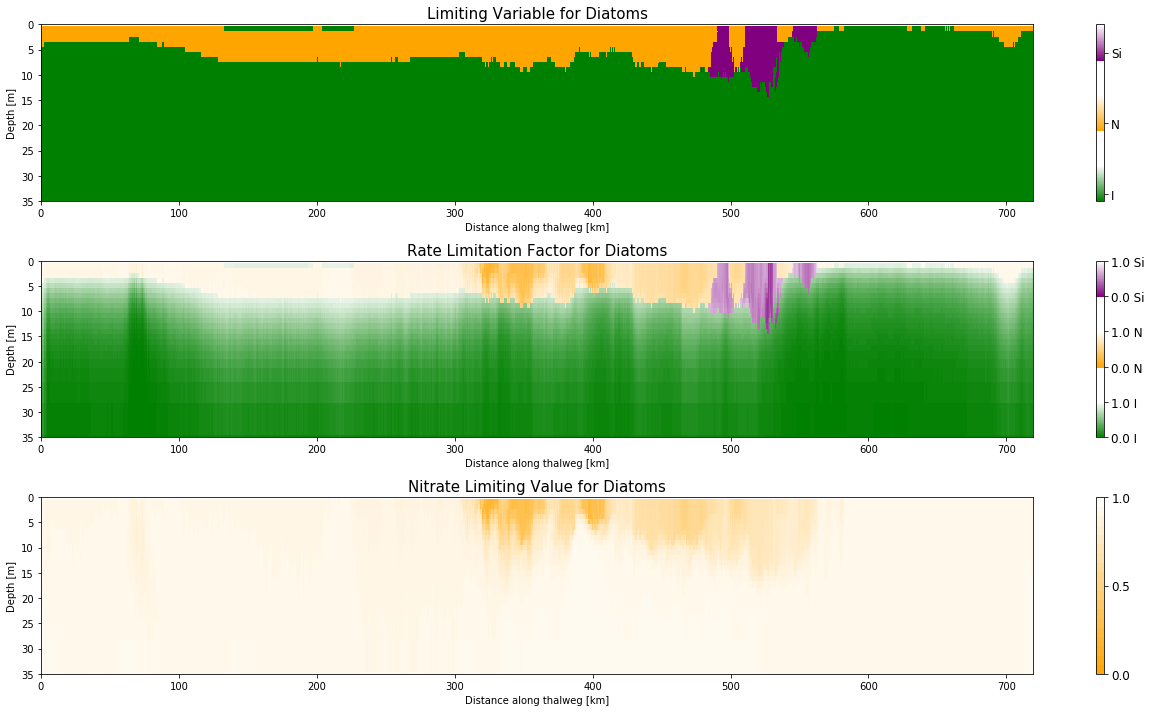

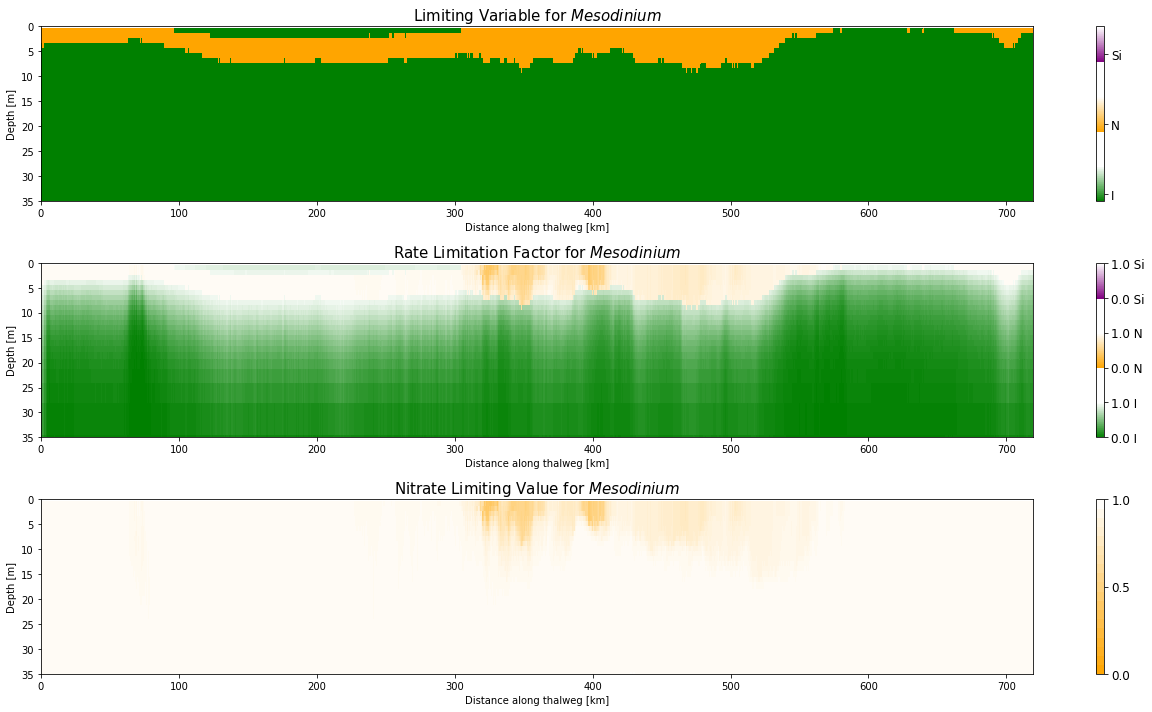

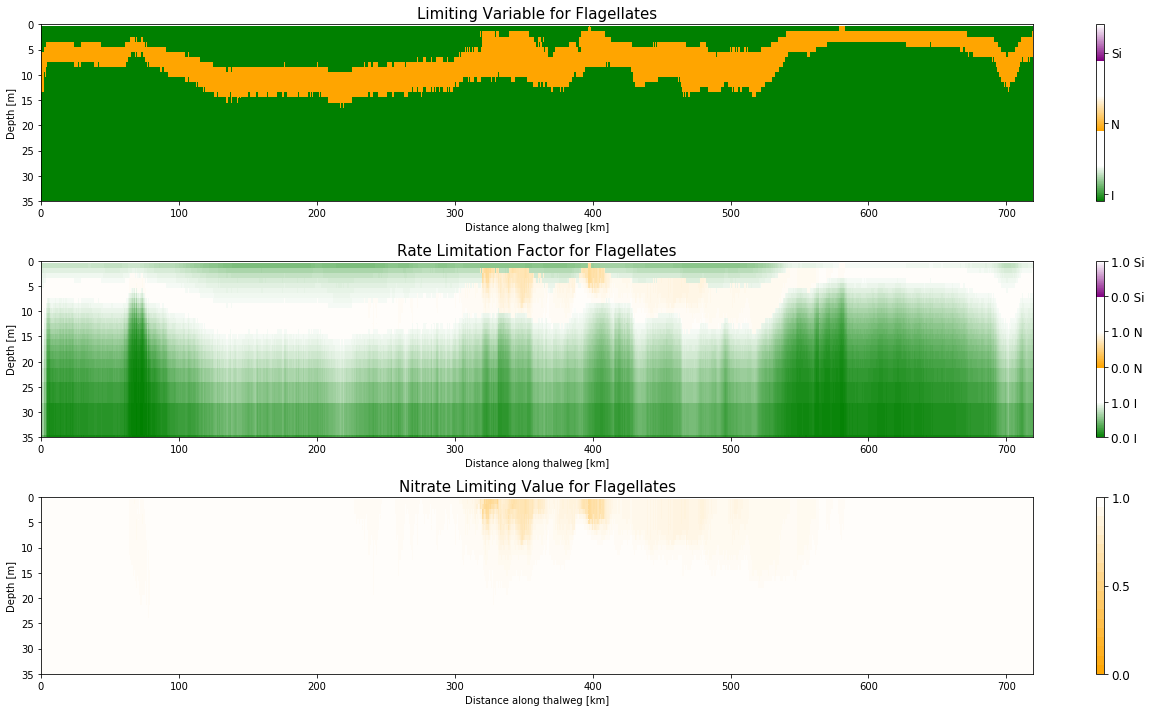

In [14]:
limit_along_thalweg(modelbase+'29aug16',
                   'SalishSea_1h_20160829_20160829_carp_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'29aug16',
                   'SalishSea_1h_20160829_20160829_carp_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'29aug16',
                   'SalishSea_1h_20160829_20160829_carp_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'29aug16',
                   'SalishSea_1h_20160829_20160829_carp_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc', 'flag')

# October 2016

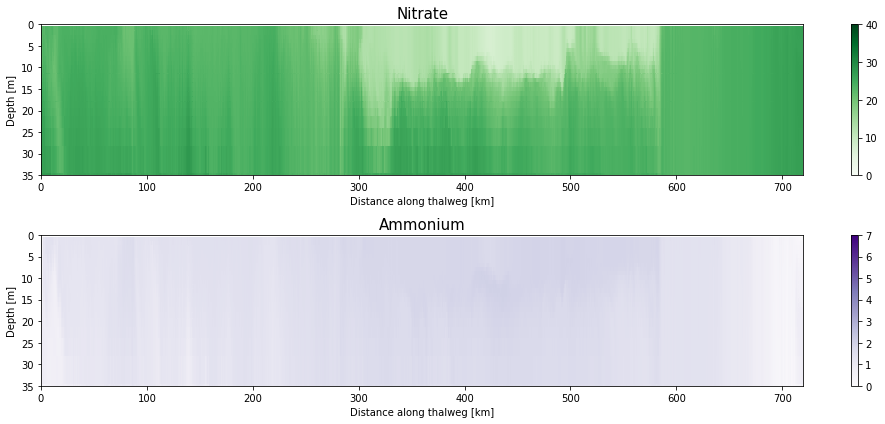

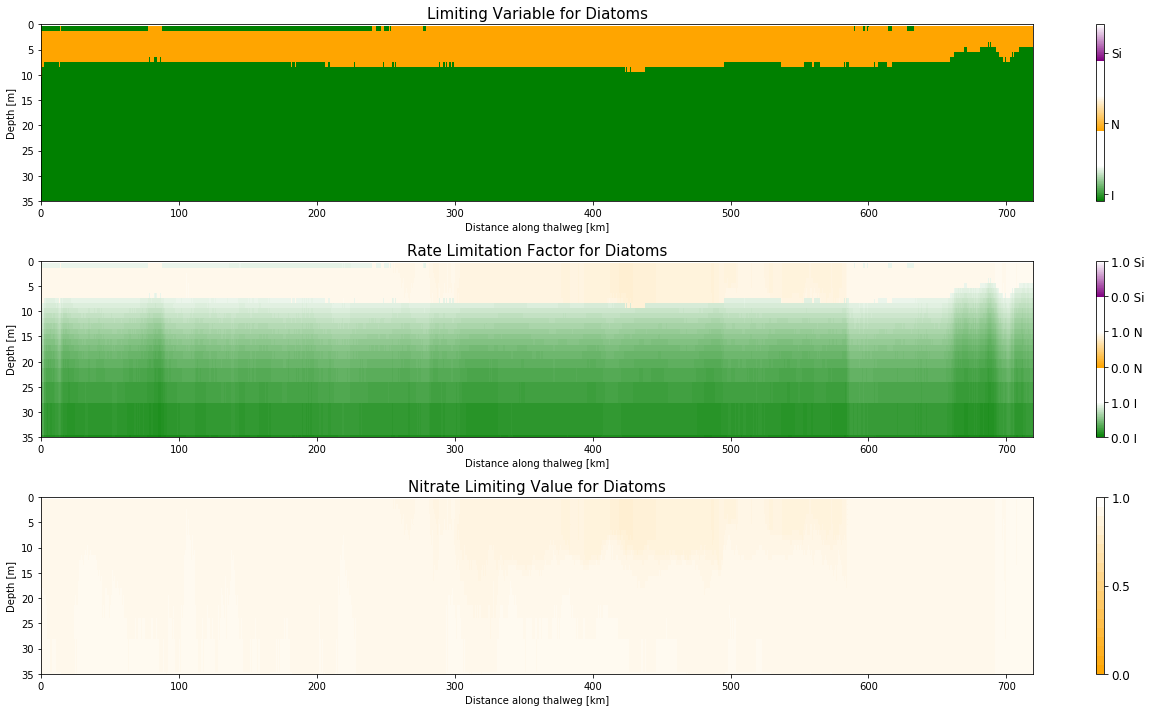

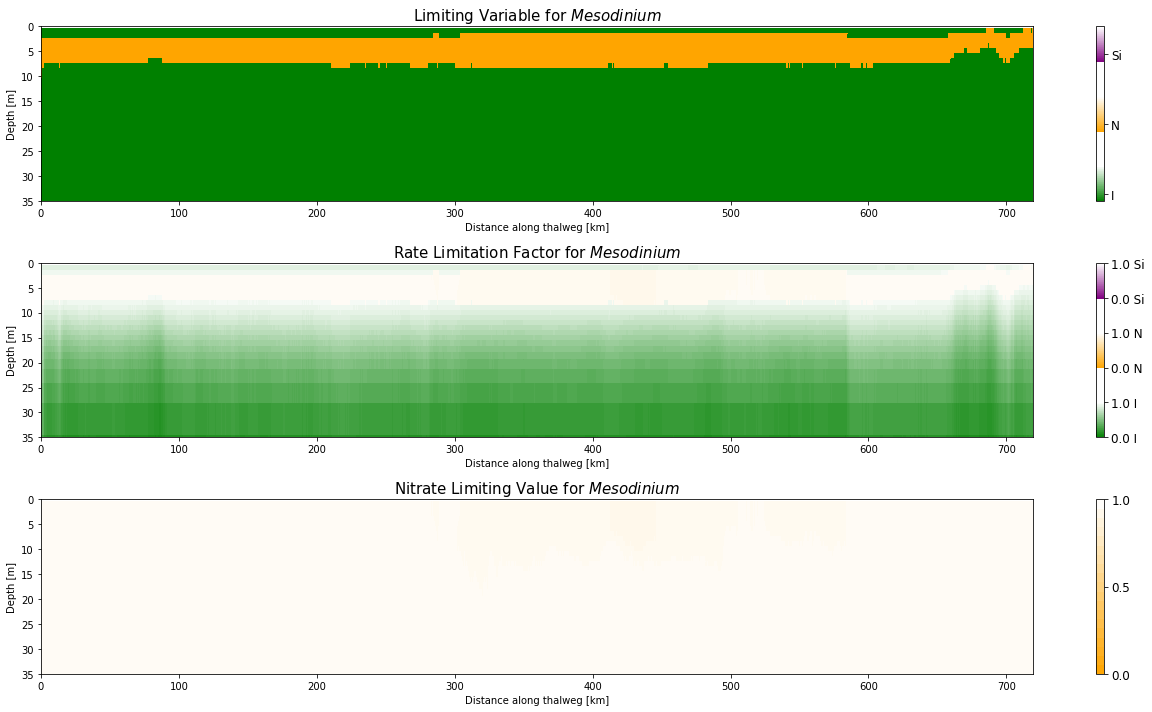

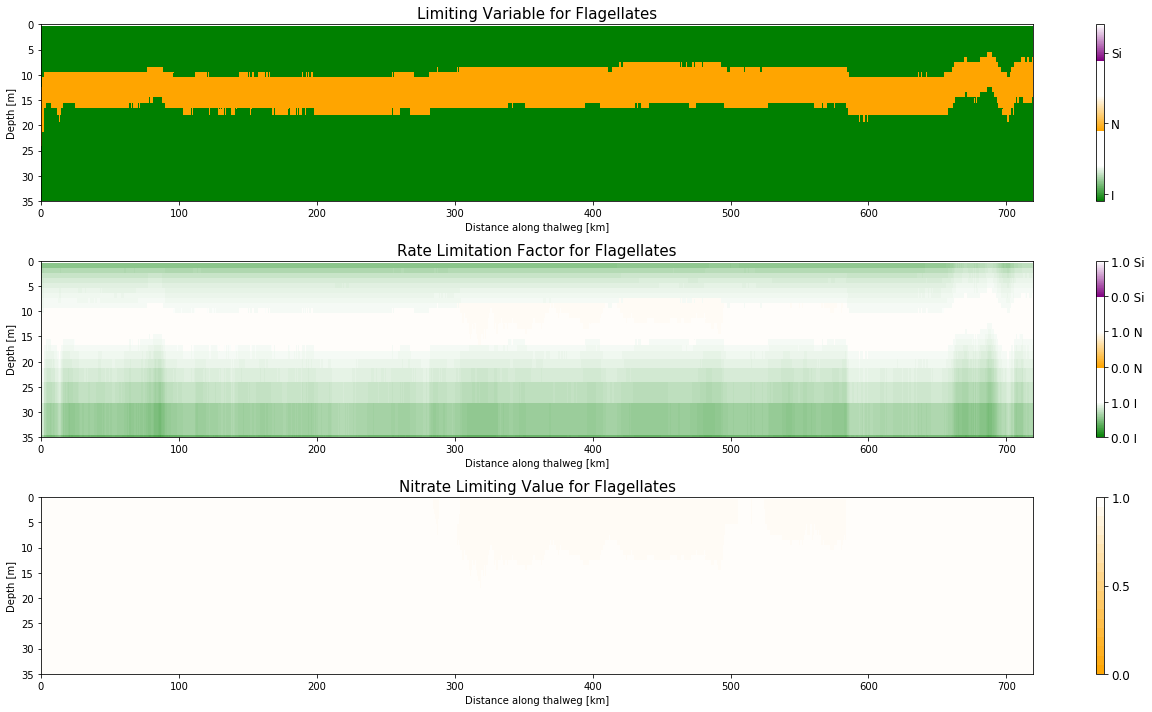

In [15]:
limit_along_thalweg(modelbase+'28sep16',
                   'SalishSea_1h_20160928_20160928_carp_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'28sep16',
                   'SalishSea_1h_20160928_20160928_carp_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'28sep16',
                   'SalishSea_1h_20160928_20160928_carp_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'28sep16',
                   'SalishSea_1h_20160928_20160928_carp_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc', 'flag')

# November 2016

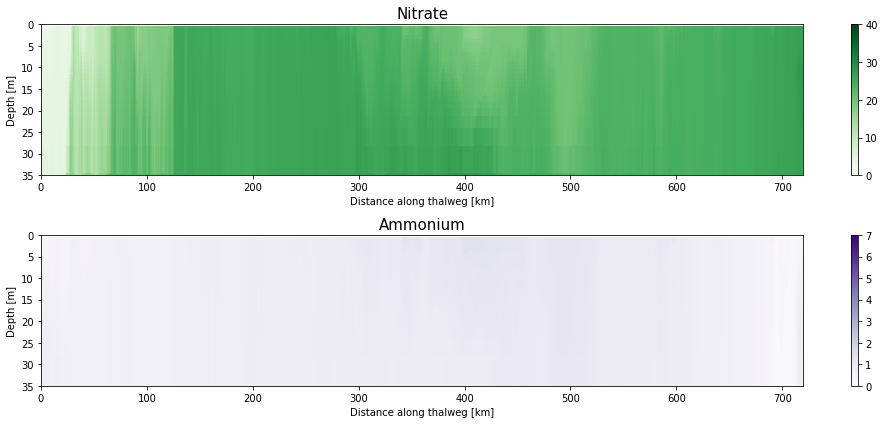

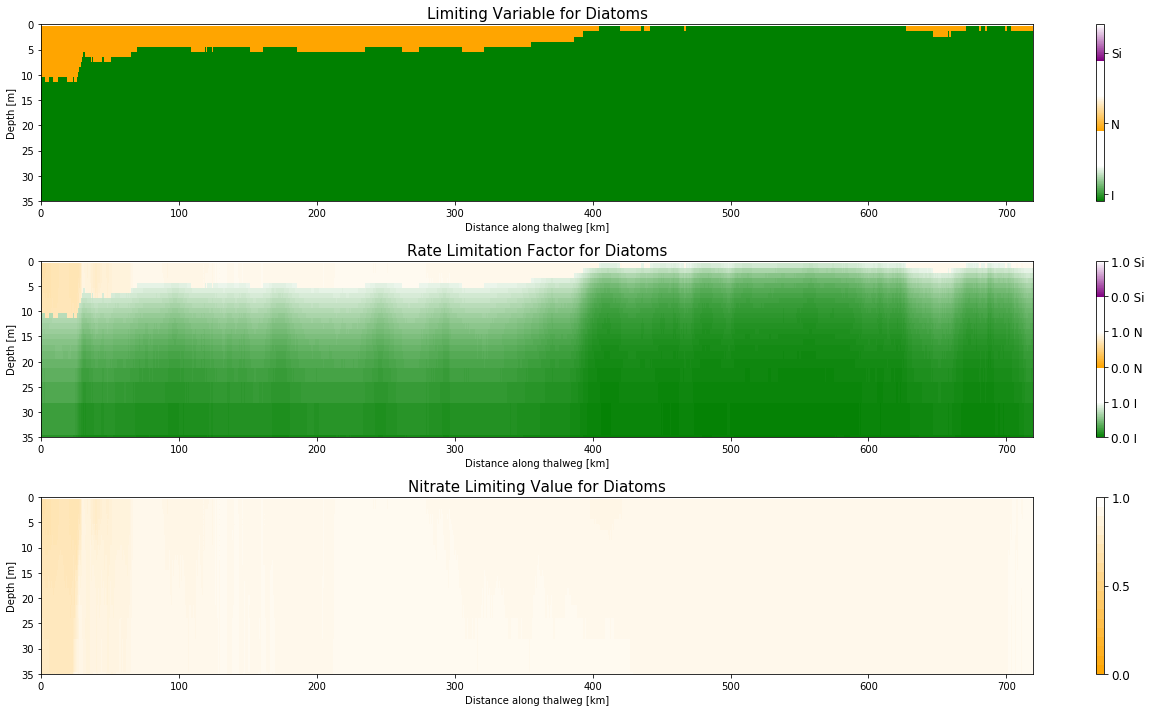

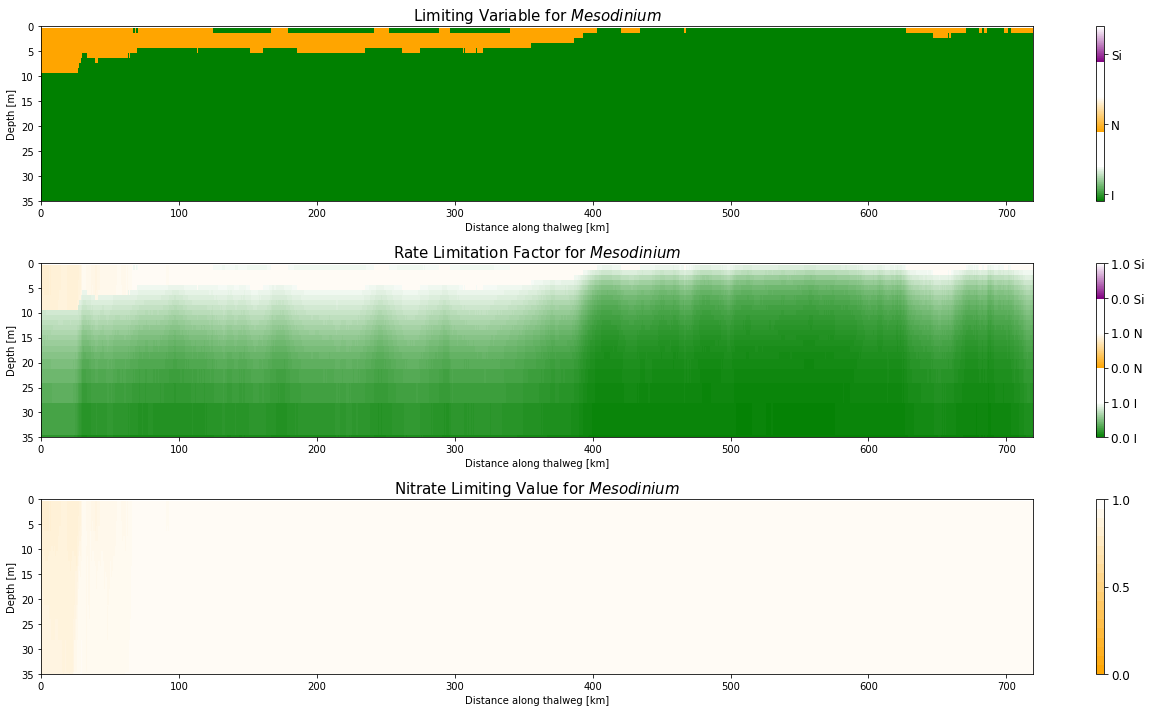

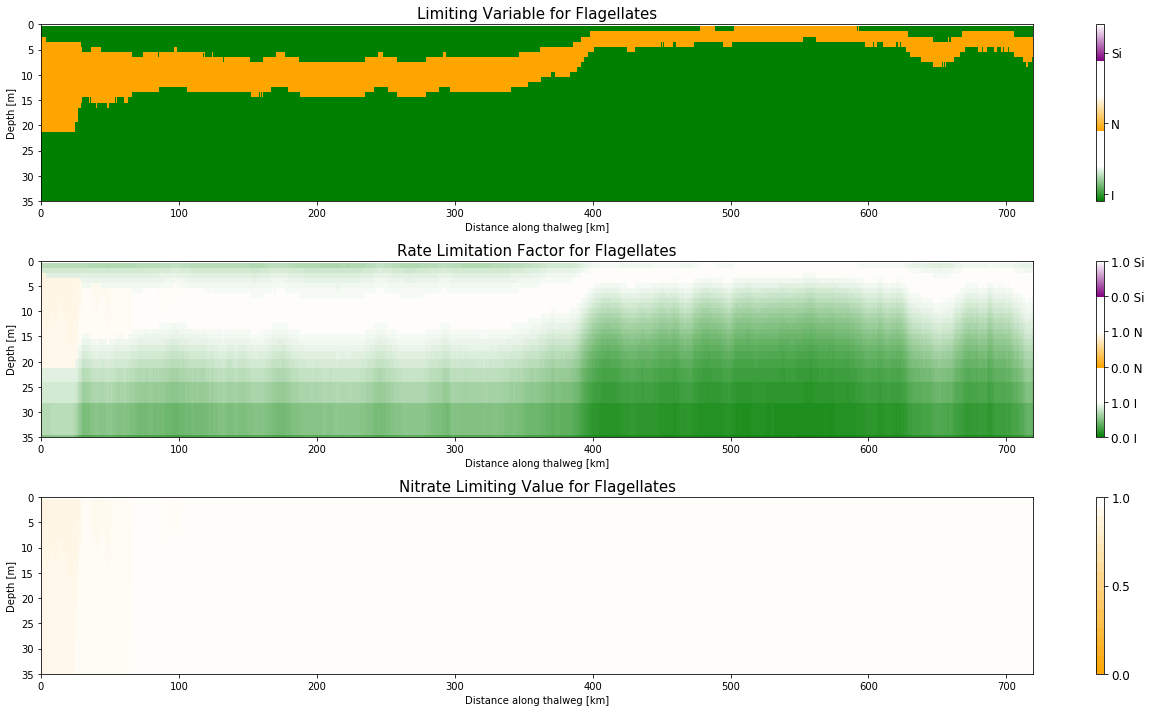

In [16]:
limit_along_thalweg(modelbase+'28oct16',
                   'SalishSea_1h_20161028_20161028_carp_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'28oct16',
                   'SalishSea_1h_20161028_20161028_carp_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'28oct16',
                   'SalishSea_1h_20161028_20161028_carp_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'28oct16',
                   'SalishSea_1h_20161028_20161028_carp_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc', 'flag')

# December 2016

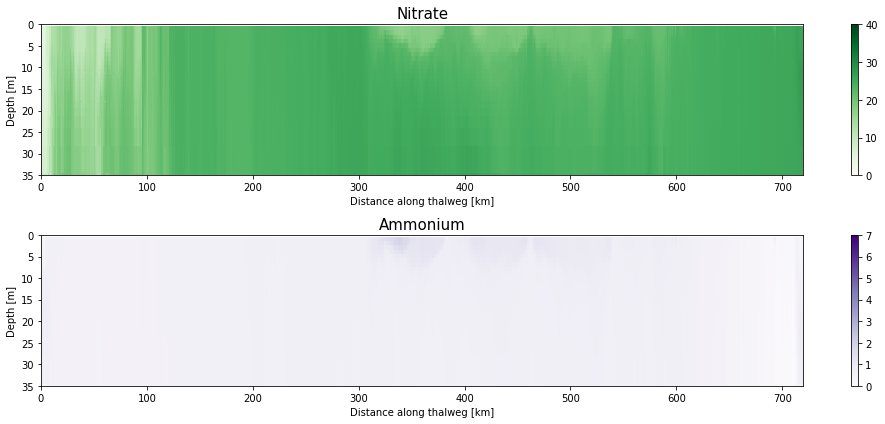

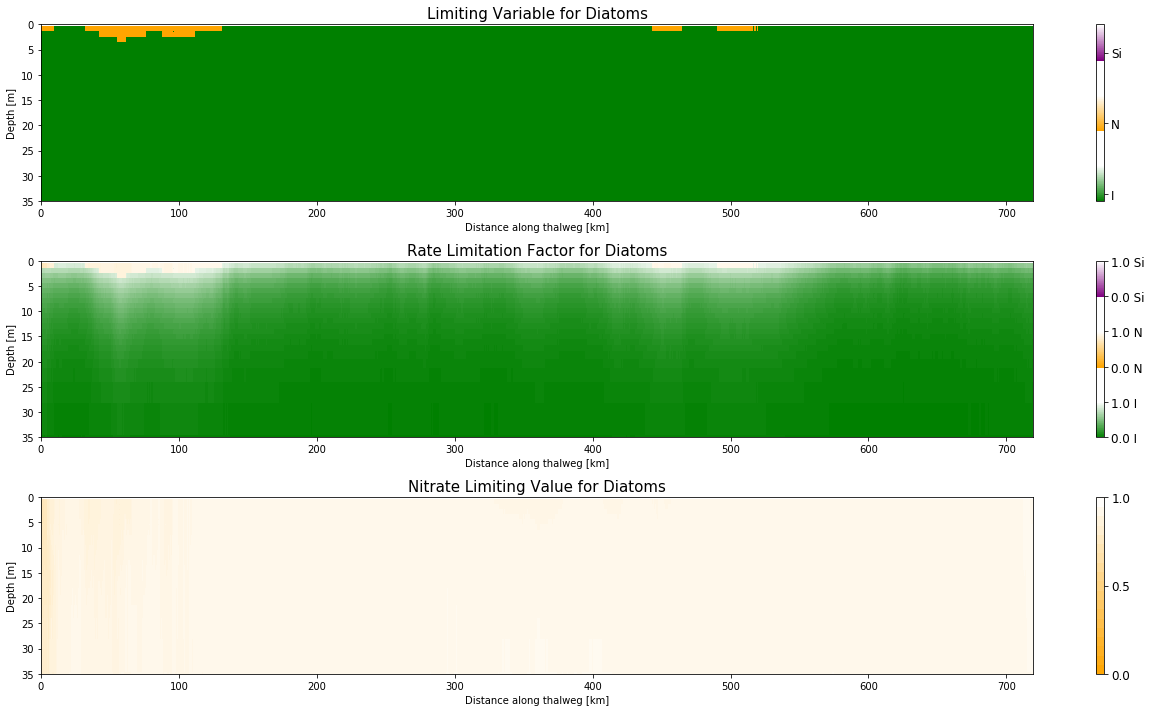

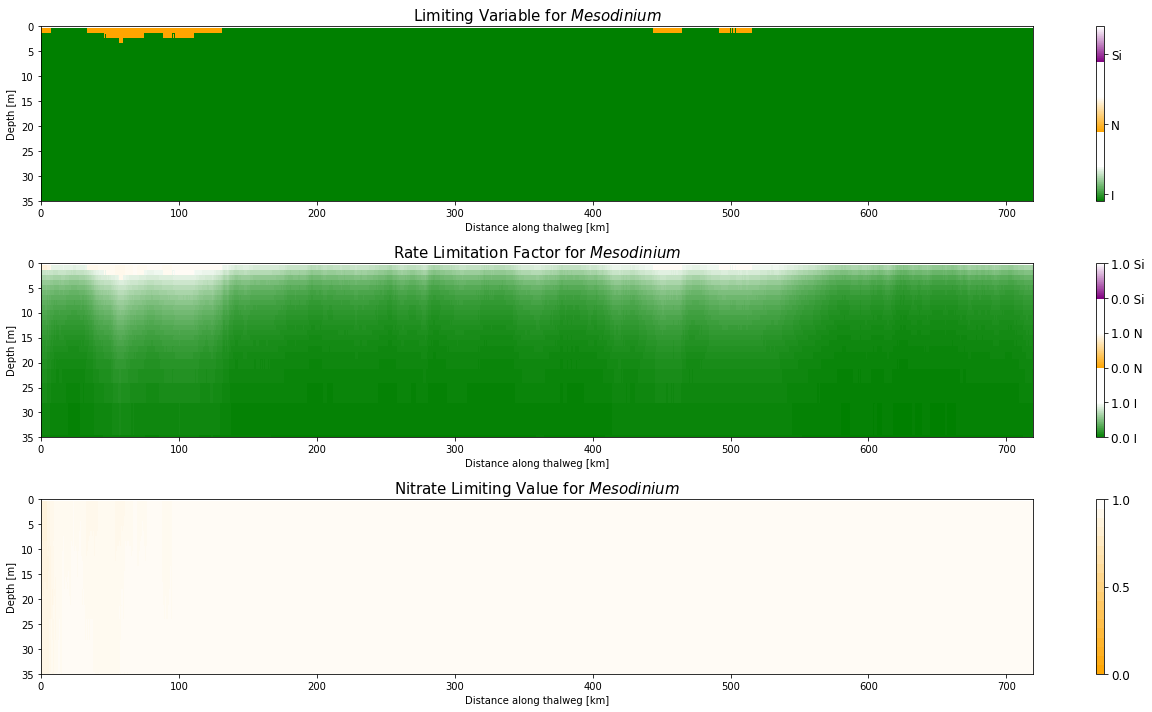

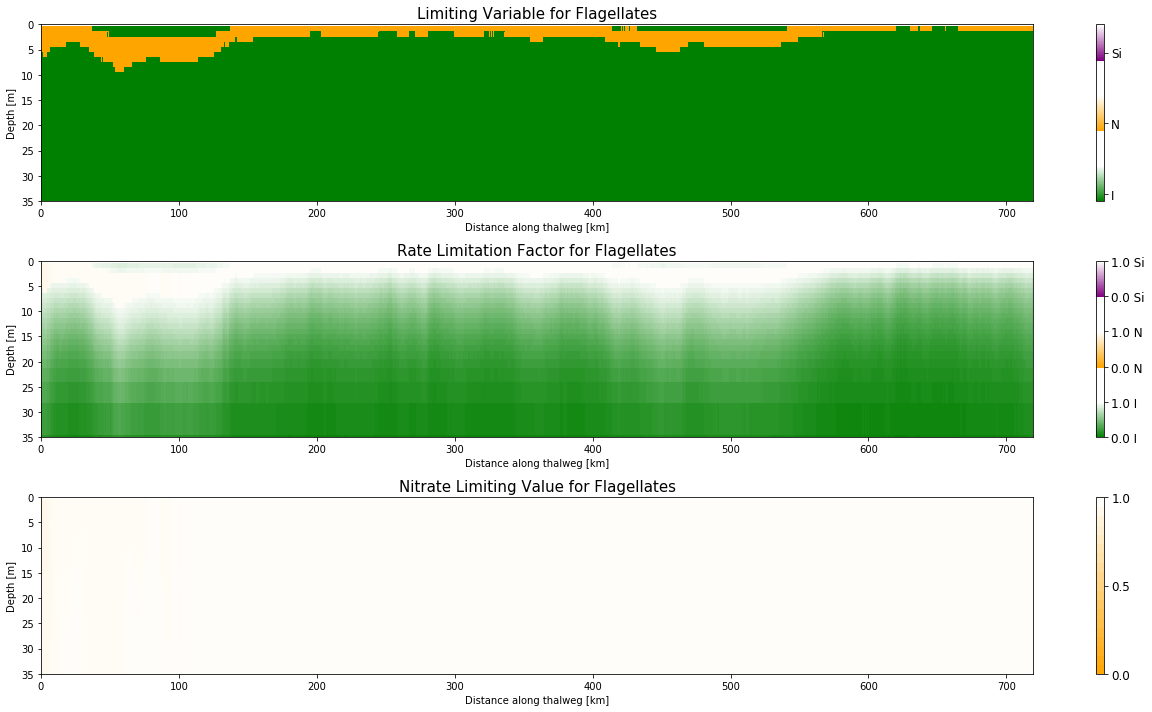

In [17]:
limit_along_thalweg(modelbase+'27nov16',
                   'SalishSea_1h_20161127_20161127_carp_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc', 'N')
limit_along_thalweg(modelbase+'27nov16',
                   'SalishSea_1h_20161127_20161127_carp_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc', 'dia')
limit_along_thalweg(modelbase+'27nov16',
                   'SalishSea_1h_20161127_20161127_carp_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc', 'meso')
limit_along_thalweg(modelbase+'27nov16',
                   'SalishSea_1h_20161127_20161127_carp_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc', 'flag')